<a href="https://www.kaggle.com/code/nguyncqun2004/student-performance?scriptVersionId=250263058" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Thành viên nhóm**
- **Võ Lê Hiếu** (nhóm trưởng) - 22028154
- **Đồng Quang Duy Hưng** - 22028121
- **Cao Chí Kiên** - 	22028065
- **Nguyễn Đức Quân** - 22028316

# Công việc của từng thành viên:
### 📌 **Võ Lê Hiếu**: tổng hợp chỉnh sửa code của các thành viên và trả lời câu hỏi 
- Học vấn của cha mẹ, income gia đình có ảnh hưởng như nào đến performance của con cái không? Liệu features liên quan đến phụ huynh có ảnh hưởng đến stress của học sinh không?
- Việc tham gia hoạt động ngoại khóa có ảnh hưởng như nào đến performance của học sinh?
### 📌 **Nguyễn Đức Quân** trả lời câu hỏi
- Có mối liên hệ đáng kể nào giữa tỷ lệ điểm danh (Attendance (%)) và học lực (Grade) không?
- Mức độ căng thẳng (Stress_Level) có liên quan gì đến giấc ngủ hoặc giờ học?
- Có thể chia sinh viên thành các nhóm hiệu suất học tập khác nhau không?
### 📌 **Đồng Quang Duy Hưng** trả lời câu hỏi
- Vậy thì yếu tố study_hour_per_week ảnh hưởng thế nào tới các hệ số điểm ? Nên học bao nhiêu tiếng cho 1 tuần cho từng đầu điểm ?
- Các yếu tố về cuộc sống: department, family income, internet access có ảnh hưởng như thế nào tới mean study_hour_week. Ngoài ra study_hour_per_week có ảnh hưởng tới yếu tố con người: stress level, sleep_hour ?
### 📌 **Cao Chí Kiên** trả lời câu hỏi
- Chế độ sinh hoạt và học tập tối ưu để đạt được kết quả học tập tốt, cụ thể là điểm cuối kì cao. Ngoài ra cần phân tích trade-off thực tế khi áp dụng các tiêu chuẩn bài toán này đề xuất (mất thời gian ngủ và thời gian sinh hoạt ngoại khoá. Cần cân nhắc đưa ra phương pháp tối ưu cho từng nhóm department (cách học của khối kinh tế vs khối công nghệ có thể khác nhau). Quan tâm đến cả mối liên hệ giữa family income và stress level -> làm sao dung hoà đc 2 điều này mà vẫn đảm bảo đc thời gian học và điểm số?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from datascience import * 
import warnings
import scipy.stats as stats
import matplotlib
#%matplotlib qt  
%matplotlib inline

In [2]:
df=pd.read_csv("/kaggle/input/students-grading-dataset/Students_Grading_Dataset.csv")

print("Tập dữ liệu:")
df.head()

Tập dữ liệu:


Student_ID First_Name Last_Name                    Email  Gender  Age  \
0      S1000       Omar  Williams  student0@university.com  Female   22   
1      S1001      Maria     Brown  student1@university.com    Male   18   
2      S1002      Ahmed     Jones  student2@university.com    Male   24   
3      S1003       Omar  Williams  student3@university.com  Female   24   
4      S1004       John     Smith  student4@university.com  Female   23   

    Department  Attendance (%)  Midterm_Score  Final_Score  ...  \
0  Mathematics           97.36          40.61        59.61  ...   
1     Business           97.71          57.27        74.00  ...   
2  Engineering           99.52          41.84        63.85  ...   
3  Engineering           90.38          45.65        44.44  ...   
4           CS           59.41          53.13        61.77  ...   

   Projects_Score  Total_Score  Grade  Study_Hours_per_Week  \
0           62.84        83.49      C                  10.3   
1           98.23        92.29      F                  27.1   
2           91.22        93.55      F                  12.4   
3           55.48        51.03      A                  25.5   
4           87.43        90.91      A                  13.3   

   Extracurricular_Activities Internet_Access_at_Home  Parent_Education_Level  \
0                         Yes                      No                Master's   
1                          No                      No             High School   
2                         Yes                      No             High School   
3                          No                     Yes             High School   
4                         Yes                      No                Master's   

  Family_Income_Level Stress_Level (1-10) Sleep_Hours_per_Night  
0              Medium                   1                   5.9  
1                 Low                   4                   4.3  
2                 Low                   9                   6.1  
3                 Low                   8                   4.9  
4              Medium                   6                   4.5  

[5 rows x 23 columns]

In [3]:
data = Table.read_table('/kaggle/input/cleaned-data/cleaned_student_data.csv')
data

Gender | Age  | Department  | Attendance (%) | Midterm_Score | Final_Score | Assignments_Avg | Quizzes_Avg | Participation_Score | Projects_Score | Total_Score | Grade | Study_Hours_per_Week | Extracurricular_Activities | Internet_Access_at_Home | Parent_Education_Level | Family_Income_Level | Stress_Level (1-10) | Sleep_Hours_per_Night
Female | 22   | Engineering | 52.899         | 55.03         | 57.82       | 84.22           | 74.06       | 3.99                | 85.9           | 56.09       | F     | 6.3                  | 0                          | 1                       | High School            | 1                   | 5                   | 4.7
Male   | 18   | Engineering | 97.27          | 97.121        | 45.8        | 74.81           | 94.24       | 8.32                | 55.65          | 52.4495     | A     | 19                   | 0                          | 1                       | Not Reported           | 1                   | 4                   | 8.8
Male   | 24   | Business    | 57.19          | 67.05         | 93.68       | 67.7            | 85.7        | 5.05                | 73.79          | 70.3        | D     | 20.7                 | 0                          | 1                       | Master's               | 0                   | 6                   | 6.2
Female | 24   | Mathematics | 95.15          | 47.79         | 80.63       | 66.06           | 93.51       | 6.54                | 92.12          | 61.63       | A     | 24.8                 | 1                          | 1                       | High School            | 2                   | 3                   | 6.7
Female | 23   | CS          | 54.18          | 46.59         | 78.89       | 96.85           | 83.7        | 5.97                | 68.42          | 66.13       | F     | 15.4                 | 1                          | 1                       | High School            | 2                   | 2                   | 7.1
Male   | 21   | Engineering | 75.4314        | 78.85         | 43.53       | 71.4            | 52.2        | 6.38                | 67.29          | 62.08       | B     | 8.5                  | 1                          | 1                       | PhD                    | 2                   | 1                   | 5
Male   | 24   | Business    | 57.6           | 66.26         | 89.07       | 84.52           | 98.4        | 2.3                 | 93.65          | 83.21       | F     | 21.3                 | 0                          | 1                       | Not Reported           | 0                   | 5                   | 6.4
Male   | 19   | Engineering | 52.899         | 45.67         | 73.96       | 80.12           | 95.9        | 3.73                | 93.24          | 81.93       | F     | 27.3                 | 1                          | 0                       | Not Reported           | 1                   | 4                   | 4.3
Female | 21   | CS          | 85.97          | 84.42         | 90.87       | 57.05           | 56.33       | 0.51                | 94.01          | 95.62       | A     | 8                    | 0                          | 0                       | Bachelor's             | 0                   | 9                   | 8.8
Female | 22   | Engineering | 64.01          | 87.96         | 96.79       | 96.98           | 55.63       | 5.88                | 78.6           | 84.99       | A     | 9.6                  | 0                          | 1                       | Not Reported           | 1                   | 10                  | 6.4
... (4990 rows omitted)

In [4]:
print(f" Số hàng: {df.shape[0]} |  Số Cột: {df.shape[1]}")

 Số hàng: 5000 |  Số Cột: 23


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              5000 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             5000 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [6]:
df.columns

Index(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age',
       'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night'],
      dtype='object')

In [7]:
df.describe()

Age  Attendance (%)  Midterm_Score  Final_Score  \
count  5000.000000     5000.000000    5000.000000  5000.000000   
mean     21.048400       75.356076      70.701924    69.546552   
std       1.989786       14.392716      17.436325    17.108996   
min      18.000000       50.010000      40.000000    40.010000   
25%      19.000000       62.945000      55.707500    54.697500   
50%      21.000000       75.670000      70.860000    69.485000   
75%      23.000000       87.862500      85.760000    83.922500   
max      24.000000      100.000000      99.990000    99.980000   

       Assignments_Avg  Quizzes_Avg  Participation_Score  Projects_Score  \
count      5000.000000  5000.000000          5000.000000      5000.00000   
mean         74.956320    74.836214             4.996372        74.78305   
std          14.404287    14.423848             2.898978        14.54243   
min          50.000000    50.000000             0.000000        50.00000   
25%          62.340000    62.357500             2.507500        61.97000   
50%          75.090000    74.905000             4.960000        74.54000   
75%          87.352500    87.292500             7.550000        87.63000   
max          99.990000    99.990000            10.000000       100.00000   

       Total_Score  Study_Hours_per_Week  Stress_Level (1-10)  \
count  5000.000000           5000.000000          5000.000000   
mean     75.021860             17.521140             5.507200   
std      14.323246              7.193035             2.886662   
min      50.010000              5.000000             1.000000   
25%      62.710000             11.500000             3.000000   
50%      75.345000             17.400000             6.000000   
75%      87.060000             23.700000             8.000000   
max      99.990000             30.000000            10.000000   

       Sleep_Hours_per_Night  
count            5000.000000  
mean                6.514420  
std                 1.446155  
min                 4.000000  
25%                 5.300000  
50%                 6.500000  
75%                 7.800000  
max                 9.000000

In [8]:
# Đếm số lượng giá trị null trong mỗi cột
null_values = df.isnull().sum()

# Kiểm tra các hàng trùng lặp
duplicate_rows = df.duplicated().sum()

# Trả về kết quả
null_values, duplicate_rows

(Student_ID                       0
 First_Name                       0
 Last_Name                        0
 Email                            0
 Gender                           0
 Age                              0
 Department                       0
 Attendance (%)                   0
 Midterm_Score                    0
 Final_Score                      0
 Assignments_Avg                  0
 Quizzes_Avg                      0
 Participation_Score              0
 Projects_Score                   0
 Total_Score                      0
 Grade                            0
 Study_Hours_per_Week             0
 Extracurricular_Activities       0
 Internet_Access_at_Home          0
 Parent_Education_Level        1025
 Family_Income_Level              0
 Stress_Level (1-10)              0
 Sleep_Hours_per_Night            0
 dtype: int64,
 0)

In [9]:
# Xử lý các giá trị thiếu
df.fillna({
    #'Attendance (%)': df['Attendance (%)'].mean(),   # Điền các giá trị thiếu ở cột 'Attendance (%)' bằng giá trị trung bình
    #'Assignments_Avg': df['Assignments_Avg'].median(), # Điền các giá trị thiếu ở cột 'Assignments_Avg' bằng giá trị trung vị
    'Parent_Education_Level': "Not Reported"         # Điền các giá trị thiếu ở cột 'Parent_Education_Level' bằng 'Not Reported'
}, inplace=True)

# Hiển thị một vài hàng mẫu để kiểm tra các thay đổi
print("\nMẫu dữ liệu đã được làm sạch:")
print(df[['Assignments_Avg', 'Parent_Education_Level', 'Attendance (%)']].sample(10))

# Kiểm tra kiểu dữ liệu sau khi làm sạch
print("\nKiểu dữ liệu sau khi làm sạch:")
print(df[['Assignments_Avg', 'Parent_Education_Level', 'Attendance (%)']].dtypes)


Mẫu dữ liệu đã được làm sạch:
      Assignments_Avg Parent_Education_Level  Attendance (%)
2726            54.65            High School           92.34
270             85.09                    PhD           93.10
4857            78.02               Master's           85.02
3483            61.14             Bachelor's           73.41
2242            61.65             Bachelor's           77.24
4409            69.80               Master's           75.23
2631            94.15            High School           99.15
3088            55.11           Not Reported           95.29
3715            61.36             Bachelor's           96.70
3341            75.95             Bachelor's           78.09

Kiểu dữ liệu sau khi làm sạch:
Assignments_Avg           float64
Parent_Education_Level     object
Attendance (%)            float64
dtype: object


In [10]:
unique_first_names = df['First_Name'].unique()
print("Các tên đầu duy nhất trong tập dữ liệu:")
print(unique_first_names)

Các tên đầu duy nhất trong tập dữ liệu:
['Omar' 'Maria' 'Ahmed' 'John' 'Liam' 'Sara' 'Emma' 'Ali']


In [11]:
name_gender_mapping = {
    'Omar': 'Male',
    'Maria': 'Female',
    'Ahmed': 'Male',
    'John': 'Male',
    'Liam': 'Male',
    'Sara': 'Female',
    'Emma': 'Female',
    'Ali': 'Male'
}

# Xác định các giá trị ngoại lệ (các hàng có giới tính không khớp với giới tính dự kiến từ tên đầu)
df['Correct_Gender'] = df['First_Name'].map(name_gender_mapping)
outliers = df[df['Gender'] != df['Correct_Gender']]

# In số lượng các trường hợp không khớp
print(f"Số lượng trường hợp giới tính không khớp: {len(outliers)}")

# Sửa các giá trị giới tính
df.loc[df['Gender'] != df['Correct_Gender'], 'Gender'] = df['Correct_Gender']

# Xóa cột tạm thời 'Correct_Gender'
df.drop(columns=['Correct_Gender'], inplace=True)

Số lượng trường hợp giới tính không khớp: 2558


In [12]:
duplicate_students = df[df.duplicated(subset=['Student_ID'], keep=False)]

# In số lượng các mục trùng lặp
print(f"Số lượng Student_ID trùng lặp: {len(duplicate_students)}")

# Xóa các bản sao, giữ lại bản ghi đầu tiên
df.drop_duplicates(subset=['Student_ID'], keep='first', inplace=True)

# Xác minh việc loại bỏ
print(f"Tập dữ liệu sau khi loại bỏ trùng lặp: {df.shape[0]} bản ghi")

Số lượng Student_ID trùng lặp: 0
Tập dữ liệu sau khi loại bỏ trùng lặp: 5000 bản ghi


In [13]:
df_cleaned = df.drop(columns=['Student_ID', 'First_Name', 'Last_Name', 'Email'])

# Hiển thị một vài hàng đầu tiên để kiểm tra các thay đổi
df_cleaned.head()

Gender  Age   Department  Attendance (%)  Midterm_Score  Final_Score  \
0    Male   22  Mathematics           97.36          40.61        59.61   
1  Female   18     Business           97.71          57.27        74.00   
2    Male   24  Engineering           99.52          41.84        63.85   
3    Male   24  Engineering           90.38          45.65        44.44   
4    Male   23           CS           59.41          53.13        61.77   

   Assignments_Avg  Quizzes_Avg  Participation_Score  Projects_Score  \
0            73.69        53.17                 7.34           62.84   
1            74.23        98.23                 8.80           98.23   
2            85.85        50.00                 0.47           91.22   
3            68.10        66.27                 0.42           55.48   
4            67.66        83.98                 6.43           87.43   

   Total_Score Grade  Study_Hours_per_Week Extracurricular_Activities  \
0        83.49     C                  10.3                        Yes   
1        92.29     F                  27.1                         No   
2        93.55     F                  12.4                        Yes   
3        51.03     A                  25.5                         No   
4        90.91     A                  13.3                        Yes   

  Internet_Access_at_Home Parent_Education_Level Family_Income_Level  \
0                      No               Master's              Medium   
1                      No            High School                 Low   
2                      No            High School                 Low   
3                     Yes            High School                 Low   
4                      No               Master's              Medium   

   Stress_Level (1-10)  Sleep_Hours_per_Night  
0                    1                    5.9  
1                    4                    4.3  
2                    9                    6.1  
3                    8                    4.9  
4                    6                    4.5

In [14]:
categorical_columns = ['Gender', 'Family_Income_Level', 'Internet_Access_at_Home', 'Extracurricular_Activities']

for col in categorical_columns:
    print(f"Các giá trị duy nhất trong cột {col}: {df[col].unique()}")

# Chuẩn hóa các giá trị (ví dụ cho cột 'Gender')
df['Gender'] = df['Gender'].replace({'M': 'Male', 'F': 'Female'})  # Nếu cần

# Đảm bảo chỉ tồn tại các danh mục hợp lệ
valid_categories = {
    'Gender': ['Male', 'Female'],
    'Family_Income_Level': ['Low', 'Medium', 'High'],
    'Internet_Access_at_Home': ['Yes', 'No'],
    'Extracurricular_Activities': ['Yes', 'No']
}

# Thay thế bất kỳ giá trị không hợp lệ nào bằng "Unknown" hoặc giá trị phổ biến nhất
for col, valid_values in valid_categories.items():
    df[col] = df[col].apply(lambda x: x if x in valid_values else 'Unknown')

# Xác minh các chỉnh sửa
for col in categorical_columns:
    print(f"Sau khi làm sạch, các giá trị duy nhất trong cột {col}: {df[col].unique()}")

Các giá trị duy nhất trong cột Gender: ['Male' 'Female']
Các giá trị duy nhất trong cột Family_Income_Level: ['Medium' 'Low' 'High']
Các giá trị duy nhất trong cột Internet_Access_at_Home: ['No' 'Yes']
Các giá trị duy nhất trong cột Extracurricular_Activities: ['Yes' 'No']
Sau khi làm sạch, các giá trị duy nhất trong cột Gender: ['Male' 'Female']
Sau khi làm sạch, các giá trị duy nhất trong cột Family_Income_Level: ['Medium' 'Low' 'High']
Sau khi làm sạch, các giá trị duy nhất trong cột Internet_Access_at_Home: ['No' 'Yes']
Sau khi làm sạch, các giá trị duy nhất trong cột Extracurricular_Activities: ['Yes' 'No']


In [15]:
def detect_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

# Các cột cần kiểm tra
numerical_columns = ['Age', 'Attendance (%)', 'Midterm_Score', 'Final_Score', 'Total_Score',
                     'Study_Hours_per_Week', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night']

# Phát hiện và đếm các giá trị ngoại lệ
for col in numerical_columns:
    outliers = detect_outliers(col)
    print(f"{col}: Phát hiện {len(outliers)} giá trị ngoại lệ")

# Tùy chọn 1: Giới hạn các giá trị ngoại lệ ở percentiles thứ 5 và 95
for col in numerical_columns:
    lower_cap = df[col].quantile(0.05)
    upper_cap = df[col].quantile(0.95)
    df[col] = np.clip(df[col], lower_cap, upper_cap)

Age: Phát hiện 0 giá trị ngoại lệ
Attendance (%): Phát hiện 0 giá trị ngoại lệ
Midterm_Score: Phát hiện 0 giá trị ngoại lệ
Final_Score: Phát hiện 0 giá trị ngoại lệ
Total_Score: Phát hiện 0 giá trị ngoại lệ
Study_Hours_per_Week: Phát hiện 0 giá trị ngoại lệ
Stress_Level (1-10): Phát hiện 0 giá trị ngoại lệ
Sleep_Hours_per_Night: Phát hiện 0 giá trị ngoại lệ


In [16]:
final_score_grade = df[['Final_Score', 'Grade']]

# Hiển thị DataFrame
print(final_score_grade)

      Final_Score Grade
0           59.61     C
1           74.00     F
2           63.85     F
3           44.44     A
4           61.77     A
...           ...   ...
4995        45.63     A
4996        47.42     C
4997        65.83     D
4998        57.45     A
4999        88.42     D

[5000 rows x 2 columns]


In [17]:
# Tạo một bản sao của DataFrame để tránh cảnh báo SettingWithCopyWarning
final_score_grade = df[['Final_Score', 'Grade']].copy()

# Định nghĩa tiêu chí chấm điểm
def expected_grade(score):
    if score >= 90:
        return 'A'
    elif score >= 80:
        return 'B'
    elif score >= 70:
        return 'C'
    elif score >= 60:
        return 'D'
    else:
        return 'F'

# Áp dụng hàm chấm điểm để xác định điểm số dự kiến
final_score_grade.loc[:, 'Expected_Grade'] = final_score_grade['Final_Score'].apply(expected_grade)

# Đếm các hàng không nhất quán, nơi điểm số thực tế không khớp với điểm số dự kiến
inconsistent_rows = final_score_grade[final_score_grade['Grade'] != final_score_grade['Expected_Grade']]

# Hiển thị số lượng các trường hợp không nhất quán
print(f"Số lượng hàng không nhất quán: {len(inconsistent_rows)}")

Số lượng hàng không nhất quán: 3991


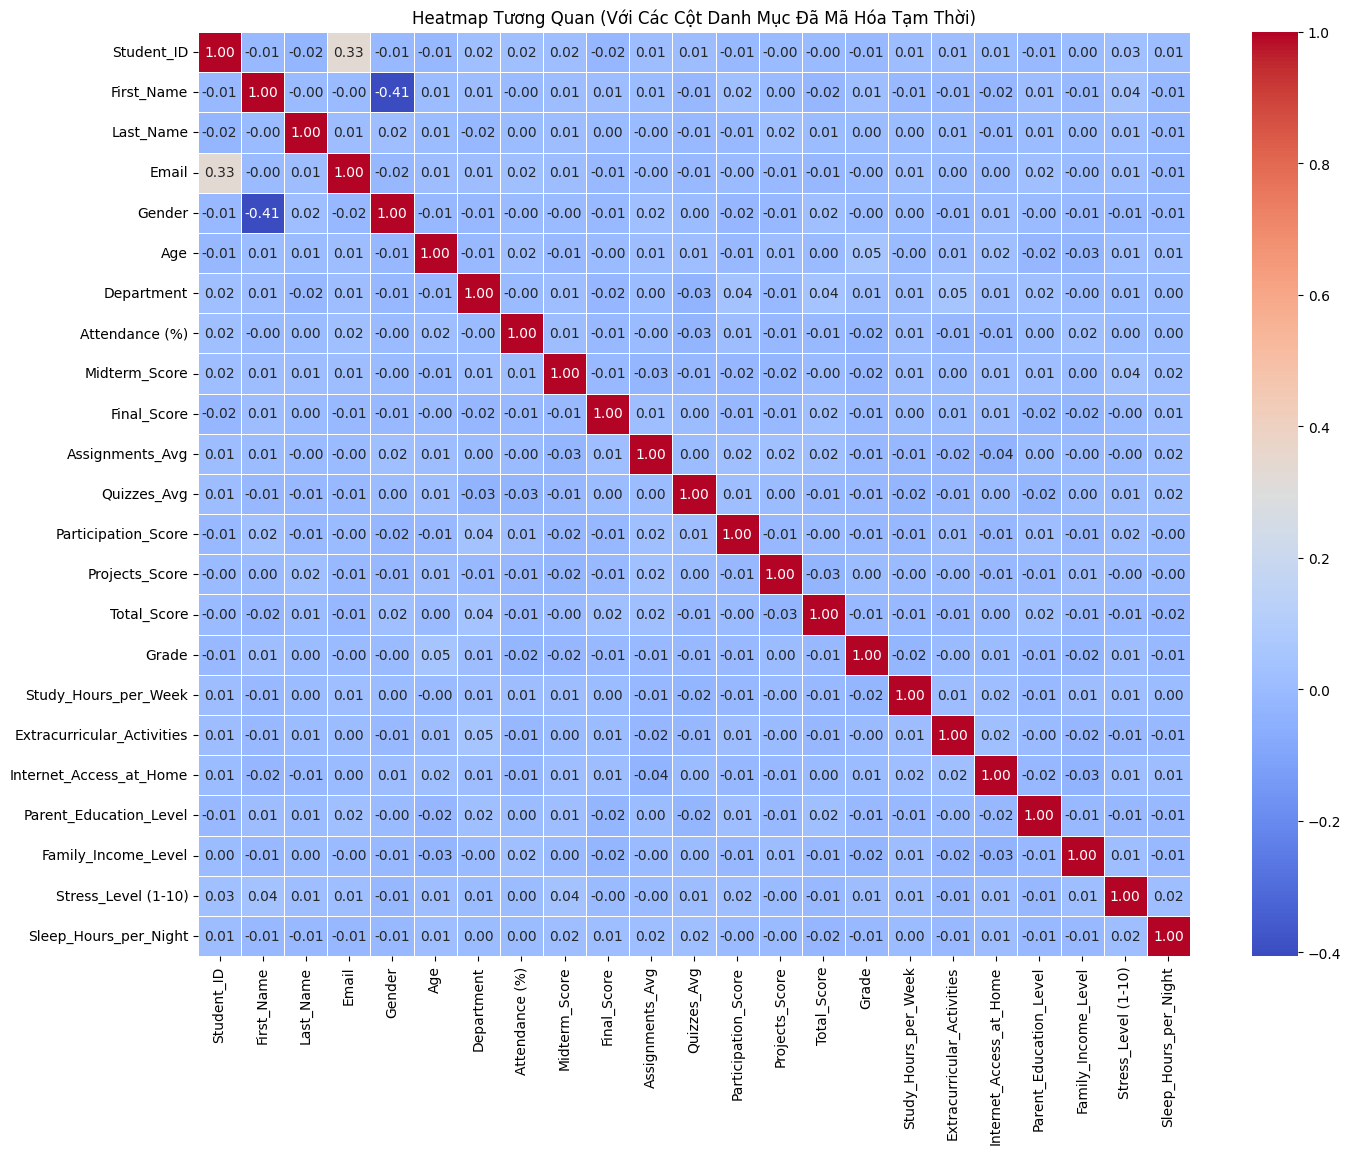

🔍 Các Cặp Cột Có Tương Quan Cao Nhất:
               Feature 1                   Feature 2  Correlation
93                Gender                  First_Name    -0.405683
3             Student_ID                       Email     0.332444
130                  Age                       Grade     0.048244
155           Department  Extracurricular_Activities     0.046647
328          Total_Score                  Department     0.041485
248      Assignments_Avg     Internet_Access_at_Home    -0.037252
282  Participation_Score                  Department     0.036783
44            First_Name         Stress_Level (1-10)     0.036642
205        Midterm_Score         Stress_Level (1-10)     0.035288
478  Family_Income_Level     Internet_Access_at_Home    -0.033732


In [18]:
# Sao chép dataframe gốc để tránh sửa đổi vĩnh viễn
df_temp = df.copy()

# Áp dụng Label Encoding tạm thời
label_encoders = {}
for col in df_temp.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_temp[col] = le.fit_transform(df_temp[col])
    label_encoders[col] = le  # Lưu trữ encoder để tham khảo trong tương lai

# Tính ma trận tương quan
correlation_matrix = df_temp.corr()

# Vẽ heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Tương Quan (Với Các Cột Danh Mục Đã Mã Hóa Tạm Thời)")
plt.show()

# Tìm các cặp cột có tương quan cao nhất
correlation_pairs = correlation_matrix.unstack().reset_index()
correlation_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Loại bỏ các tương quan tự thân (tương quan của một đặc trưng với chính nó)
correlation_pairs = correlation_pairs[correlation_pairs['Feature 1'] != correlation_pairs['Feature 2']]

# Sắp xếp theo giá trị tuyệt đối của tương quan theo thứ tự giảm dần
correlation_pairs = correlation_pairs.reindex(correlation_pairs['Correlation'].abs().sort_values(ascending=False).index)

# Loại bỏ các cặp trùng lặp (vì tương quan là đối xứng)
correlation_pairs = correlation_pairs.iloc[::2]

# In các cặp cột có tương quan cao nhất
print("🔍 Các Cặp Cột Có Tương Quan Cao Nhất:")
print(correlation_pairs.head(10))  # Điều chỉnh số lượng để xem nhiều hoặc ít cặp hơn

# Hoàn nguyên về các giá trị danh mục ban đầu
for col, le in label_encoders.items():
    df_temp[col] = le.inverse_transform(df_temp[col])

In [19]:
# Bước 1: Tạo các bậc 
def categorize_attendance(attendance):
    if attendance >= 80:
        return "Cao"
    elif attendance >= 60:
        return "Trung bình"
    else:
        return "Thấp"

df["Attendance_Tier"] = df["Attendance (%)"].apply(categorize_attendance)

# Xác định các cột danh mục cho các kiểm định chi bình phương
chi_square_tests = [
    ("Gender", "Grade"),
    ("Family_Income_Level", "Study_Hours_per_Week"),
    ("Attendance_Tier", "Grade"),  # Bây giờ Attendance_Tier đã tồn tại
    ("Extracurricular_Activities", "Grade"),
    ("Attendance_Tier", "Sleep_Hours_per_Night")  # посещаемость & Giấc ngủ
]

# Bước 2: Thực hiện kiểm định Chi-Square
for col1, col2 in chi_square_tests:
    contingency_table = pd.crosstab(df[col1], df[col2])  # Tạo bảng tần số chéo
    chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)  # Thực hiện kiểm định chi bình phương

    print(f"🔹 Giả thuyết: {col1} vs. {col2}")
    print(f"    - Thống kê Chi bình phương: {chi2_stat:.4f}")
    print(f"    - P-Value: {p_value:.4f}")

    if p_value < 0.05:
        print("    ✅ Mối quan hệ này có ý nghĩa thống kê.\n")
    else:
        print("    ❌ Không có mối quan hệ đáng kể giữa các nhóm.\n")

🔹 Giả thuyết: Gender vs. Grade
    - Thống kê Chi bình phương: 2.0774
    - P-Value: 0.7215
    ❌ Không có mối quan hệ đáng kể giữa các nhóm.

🔹 Giả thuyết: Family_Income_Level vs. Study_Hours_per_Week
    - Thống kê Chi bình phương: 484.4956
    - P-Value: 0.1132
    ❌ Không có mối quan hệ đáng kể giữa các nhóm.

🔹 Giả thuyết: Attendance_Tier vs. Grade
    - Thống kê Chi bình phương: 14.1050
    - P-Value: 0.0791
    ❌ Không có mối quan hệ đáng kể giữa các nhóm.

🔹 Giả thuyết: Extracurricular_Activities vs. Grade
    - Thống kê Chi bình phương: 0.5642
    - P-Value: 0.9670
    ❌ Không có mối quan hệ đáng kể giữa các nhóm.

🔹 Giả thuyết: Attendance_Tier vs. Sleep_Hours_per_Night
    - Thống kê Chi bình phương: 70.4370
    - P-Value: 0.9151
    ❌ Không có mối quan hệ đáng kể giữa các nhóm.



In [20]:
# Xác định các kiểm định ANOVA: (Biến số, Biến danh mục)
def categorize_attendance(attendance):
    if attendance >= 80:
        return "Cao"
    elif attendance >= 60:
        return "Trung bình"
    else:
        return "Thấp"

df["Attendance_Tier"] = df["Attendance (%)"].apply(categorize_attendance)

anova_tests = [
    ('Total_Score', 'Attendance_Tier'),
    ('Study_Hours_per_Week', 'Family_Income_Level'),
    ('Final_Score', 'Parent_Education_Level'),
    ('Sleep_Hours_per_Night', 'Department'),
    ('Attendance (%)', 'Grade')  # Thêm kiểm định mới
]

# Thực hiện ANOVA cho mỗi cặp
for num_col, cat_col in anova_tests:
    groups = [df[num_col][df[cat_col] == category] for category in df[cat_col].unique()]
    f_stat, p_value = stats.f_oneway(*groups)

    print(f"🔹 Giả thuyết: {cat_col} vs. {num_col}")
    print(f"    - Thống kê F: {f_stat:.4f}")
    print(f"    - P-Value: {p_value:.4f}")

    if p_value < 0.05:
        print("    ✅ Có sự khác biệt đáng kể giữa các nhóm.\n")
    else:
        print("    ❌ Không có sự khác biệt đáng kể giữa các nhóm.\n")

🔹 Giả thuyết: Attendance_Tier vs. Total_Score
    - Thống kê F: 0.3699
    - P-Value: 0.6908
    ❌ Không có sự khác biệt đáng kể giữa các nhóm.

🔹 Giả thuyết: Family_Income_Level vs. Study_Hours_per_Week
    - Thống kê F: 0.2579
    - P-Value: 0.7727
    ❌ Không có sự khác biệt đáng kể giữa các nhóm.

🔹 Giả thuyết: Parent_Education_Level vs. Final_Score
    - Thống kê F: 0.9020
    - P-Value: 0.4617
    ❌ Không có sự khác biệt đáng kể giữa các nhóm.

🔹 Giả thuyết: Department vs. Sleep_Hours_per_Night
    - Thống kê F: 0.3459
    - P-Value: 0.7921
    ❌ Không có sự khác biệt đáng kể giữa các nhóm.

🔹 Giả thuyết: Grade vs. Attendance (%)
    - Thống kê F: 1.1828
    - P-Value: 0.3161
    ❌ Không có sự khác biệt đáng kể giữa các nhóm.



🔹 Phân bố số lượng theo Grade:
Grade
B    1014
D    1011
F    1003
A     997
C     975
Name: count, dtype: int64


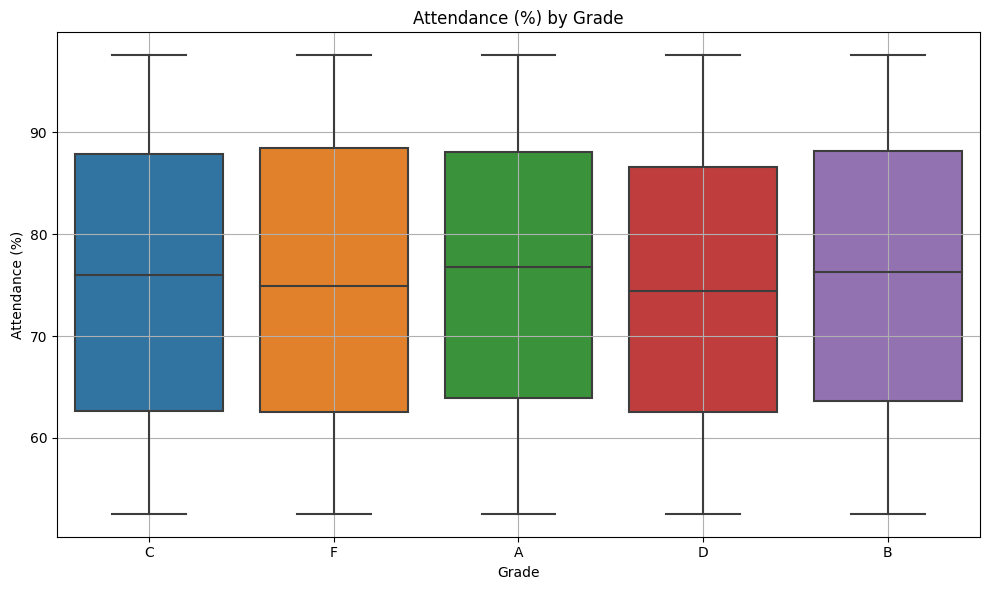

🔍 ANOVA kiểm định: Attendance (%) theo Grade
   - F-statistic: 1.1828
   - P-value    : 0.3161
   ❌ Không có sự khác biệt đáng kể giữa các nhóm.


In [21]:
# 🔍 Kiểm tra vì sao ANOVA giữa Attendance (%) và Grade không significant

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 1. Kiểm tra phân bố số lượng từng nhóm Grade
print("🔹 Phân bố số lượng theo Grade:")
print(df['Grade'].value_counts(dropna=False))

# 2. Vẽ boxplot để xem phân bố Attendance (%) theo Grade
plt.figure(figsize=(10, 6))
sns.boxplot(x='Grade', y='Attendance (%)', data=df)
plt.title('Attendance (%) by Grade')
plt.xlabel('Grade')
plt.ylabel('Attendance (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. In lại giá trị F-statistic và p-value của kiểm định ANOVA
groups = [df['Attendance (%)'][df['Grade'] == g].dropna() for g in df['Grade'].dropna().unique()]
f_stat, p_val = stats.f_oneway(*groups)

print(f"🔍 ANOVA kiểm định: Attendance (%) theo Grade")
print(f"   - F-statistic: {f_stat:.4f}")
print(f"   - P-value    : {p_val:.4f}")
if p_val < 0.05:
    print("   ✅ Có sự khác biệt có ý nghĩa thống kê.")
else:
    print("   ❌ Không có sự khác biệt đáng kể giữa các nhóm.")


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total_Score  Study_Hours_per_Week  Attendance (%)  \
Cluster                                                      
0              84.90                 17.31           75.41   
1              82.75                 17.15           75.24   
2              59.89                 18.03           75.42   

         Stress_Level (1-10)  
Cluster                       
0                       8.21  
1                       2.77  
2                       5.84

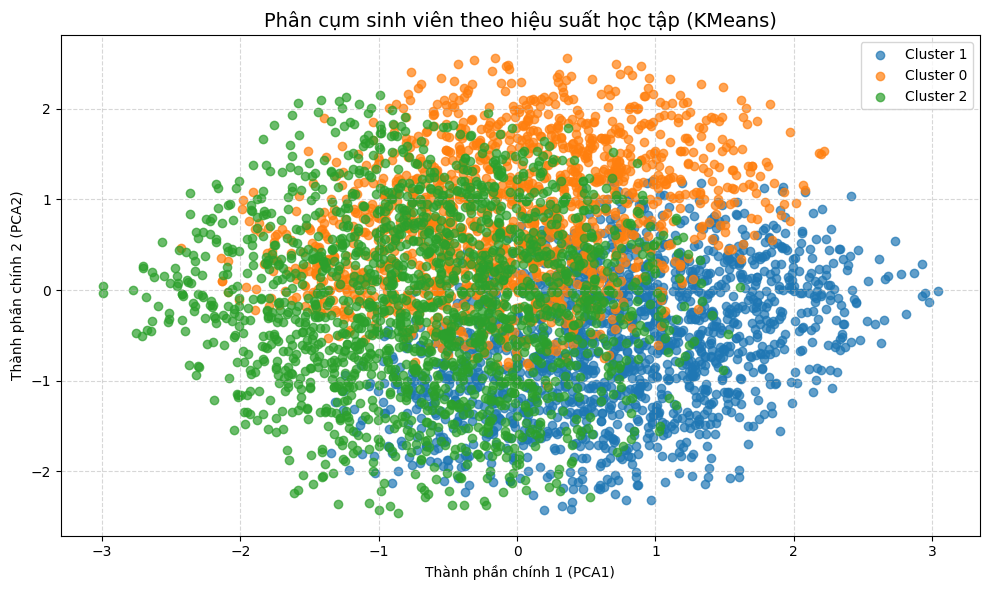

💡 Gợi ý đặt tên cụm (dựa trên đặc trưng trung bình):
- Cluster 0: Nhóm học tốt nhưng căng thẳng cao (Hard Workers)
- Cluster 1: Nhóm học tốt, hiệu quả và ít căng thẳng (High Achievers)
- Cluster 2: Nhóm cần hỗ trợ thêm (At-Risk Group)


In [22]:
# 📌 Phân nhóm sinh viên theo hiệu suất học tập bằng KMeans (chỉnh sửa tên cụm chính xác)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Các đặc trưng đại diện cho hiệu suất học tập
cluster_features = ['Total_Score', 'Study_Hours_per_Week', 'Attendance (%)', 'Stress_Level (1-10)']

# Loại bỏ các dòng thiếu dữ liệu
df_cluster_input = df[cluster_features].dropna().copy()

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster_input)

# Chạy KMeans với 3 cụm
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster_input['Cluster'] = kmeans.fit_predict(X_scaled)

# Tính trung bình đặc trưng mỗi cụm
cluster_summary = df_cluster_input.groupby('Cluster')[cluster_features].mean().round(2)
display(cluster_summary)

# Giảm chiều dữ liệu để trực quan hóa
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_cluster_input['PCA1'] = X_pca[:, 0]
df_cluster_input['PCA2'] = X_pca[:, 1]

# Vẽ biểu đồ cụm sinh viên
plt.figure(figsize=(10, 6))
for label in df_cluster_input['Cluster'].unique():
    subset = df_cluster_input[df_cluster_input['Cluster'] == label]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {label}', alpha=0.7)

plt.title('Phân cụm sinh viên theo hiệu suất học tập (KMeans)', fontsize=14)
plt.xlabel('Thành phần chính 1 (PCA1)')
plt.ylabel('Thành phần chính 2 (PCA2)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Gợi ý đặt tên cụm (đã xác thực theo cluster_summary)
print("💡 Gợi ý đặt tên cụm (dựa trên đặc trưng trung bình):")
print("- Cluster 0: Nhóm học tốt nhưng căng thẳng cao (Hard Workers)")
print("- Cluster 1: Nhóm học tốt, hiệu quả và ít căng thẳng (High Achievers)")
print("- Cluster 2: Nhóm cần hỗ trợ thêm (At-Risk Group)")

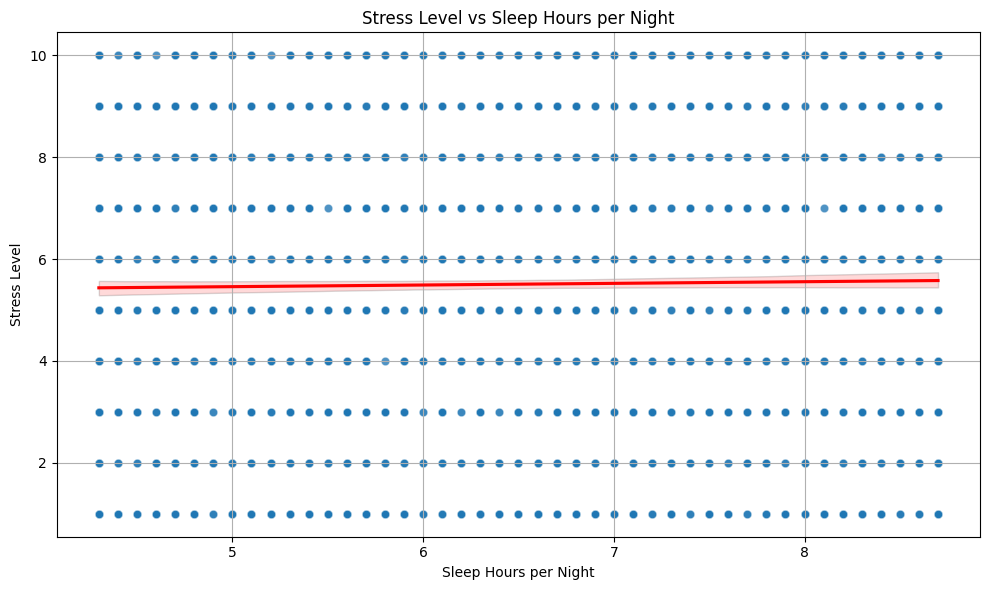

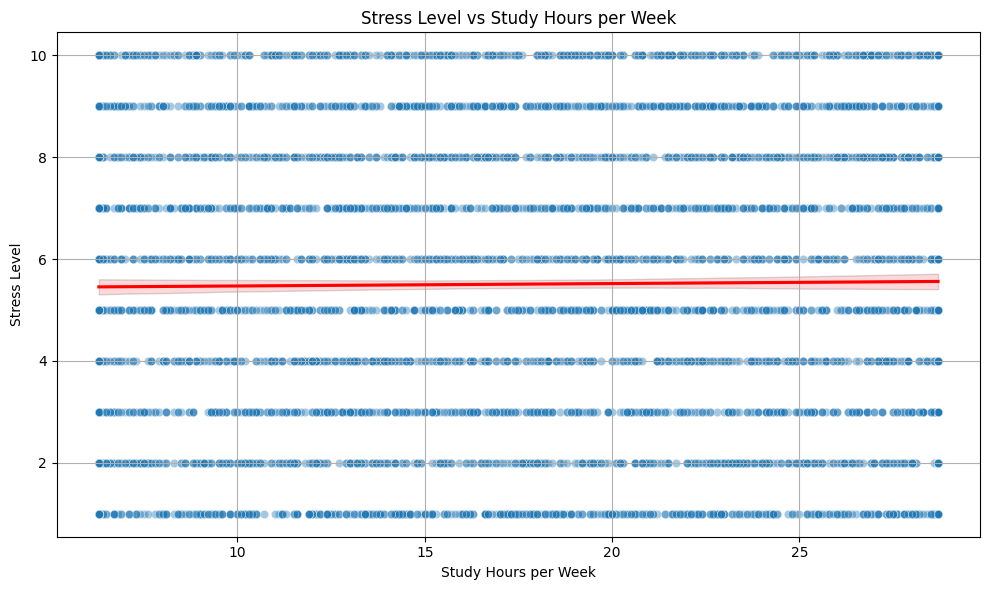

📊 Hệ số tương quan giữa Stress và Sleep Hours: 0.016
📊 Hệ số tương quan giữa Stress và Study Hours: 0.012


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


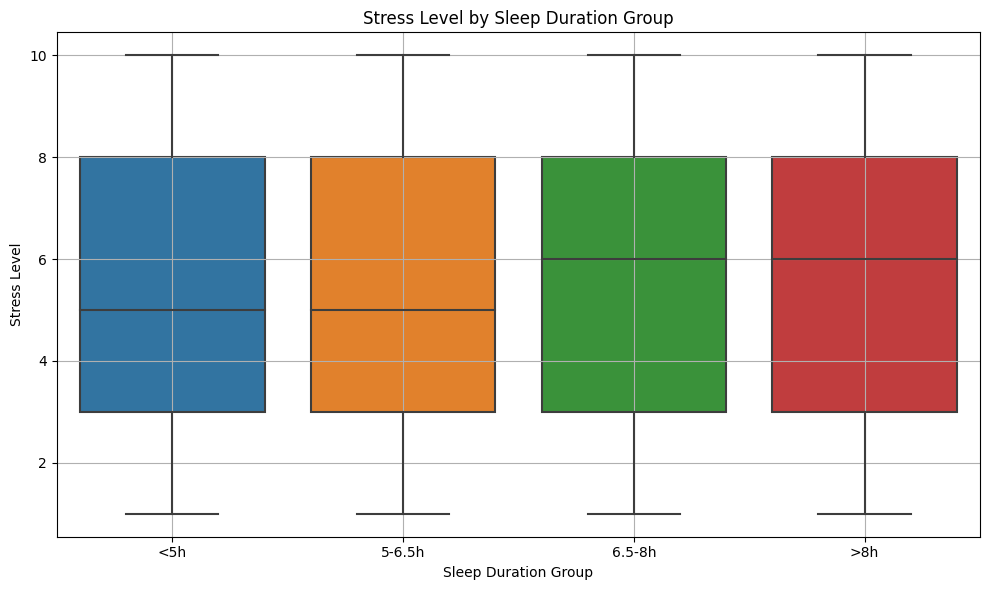

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


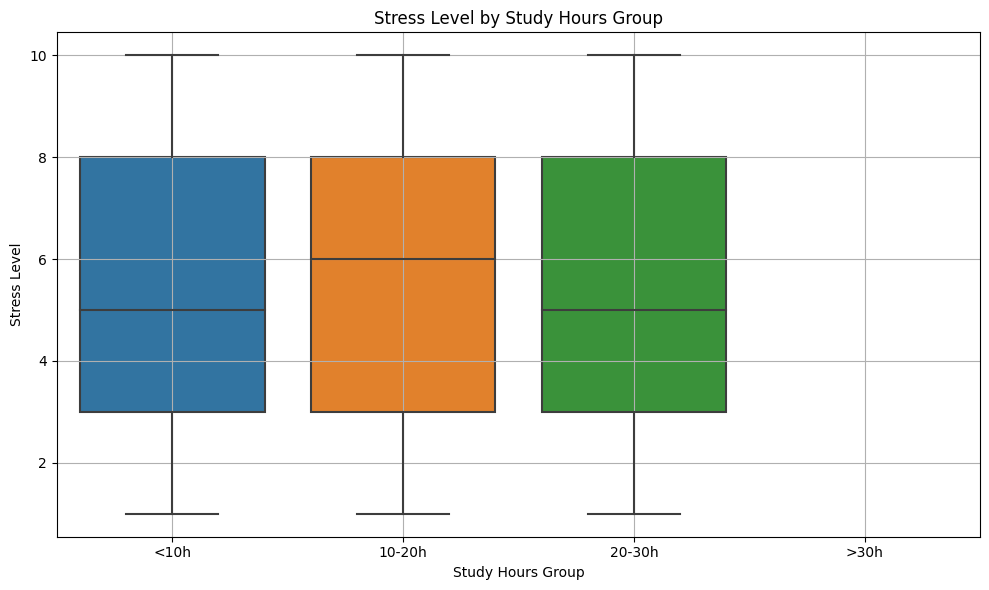

In [23]:
# 📌 Phân tích mối liên hệ giữa Mức độ căng thẳng (Stress_Level) với Giấc ngủ và Giờ học

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Đổi tên cột stress cho ngắn gọn
df['Stress'] = df['Stress_Level (1-10)']

# 1. Biểu đồ phân phối Stress theo Sleep Hours
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sleep_Hours_per_Night', y='Stress', data=df, alpha=0.4)
sns.regplot(x='Sleep_Hours_per_Night', y='Stress', data=df, scatter=False, color='red')
plt.title('Stress Level vs Sleep Hours per Night')
plt.xlabel('Sleep Hours per Night')
plt.ylabel('Stress Level')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Biểu đồ phân phối Stress theo Study Hours
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Study_Hours_per_Week', y='Stress', data=df, alpha=0.4)
sns.regplot(x='Study_Hours_per_Week', y='Stress', data=df, scatter=False, color='red')
plt.title('Stress Level vs Study Hours per Week')
plt.xlabel('Study Hours per Week')
plt.ylabel('Stress Level')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Tính hệ số tương quan
sleep_corr = df[['Stress', 'Sleep_Hours_per_Night']].dropna().corr().iloc[0,1]
study_corr = df[['Stress', 'Study_Hours_per_Week']].dropna().corr().iloc[0,1]

print(f"📊 Hệ số tương quan giữa Stress và Sleep Hours: {sleep_corr:.3f}")
print(f"📊 Hệ số tương quan giữa Stress và Study Hours: {study_corr:.3f}")

# 4. Phân tích bổ sung: tạo boxplot stress theo nhóm sleep
df['Sleep_Group'] = pd.cut(df['Sleep_Hours_per_Night'], bins=[0, 5, 6.5, 8, 10], labels=['<5h', '5-6.5h', '6.5-8h', '>8h'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sleep_Group', y='Stress', data=df)
plt.title('Stress Level by Sleep Duration Group')
plt.xlabel('Sleep Duration Group')
plt.ylabel('Stress Level')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Boxplot stress theo nhóm học nhiều/ít
df['Study_Group'] = pd.cut(df['Study_Hours_per_Week'], bins=[0, 10, 20, 30, 100], labels=['<10h', '10-20h', '20-30h', '>30h'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='Study_Group', y='Stress', data=df)
plt.title('Stress Level by Study Hours Group')
plt.xlabel('Study Hours Group')
plt.ylabel('Stress Level')
plt.grid(True)
plt.tight_layout()
plt.show()

✅ 1. Tương quan rất yếu gần như không tồn tại
Biến so sánh	Hệ số tương quan (r)	Giải thích
Stress vs. Sleep Hours	0.016	Gần như không tương quan
Stress vs. Study Hours/Week	0.012	Cực kỳ yếu, gần bằng 0

👉 Điều này cho thấy: càng ngủ nhiều hoặc học nhiều không đồng nghĩa với mức độ căng thẳng thay đổi rõ rệt.

📊 2. Biểu đồ scatter + đường hồi quy
Cả hai biểu đồ (Sleep ↔ Stress, Study ↔ Stress) đều cho thấy đường hồi quy gần như phẳng.

Các điểm dữ liệu phân bố đều theo chiều ngang → không có xu hướng rõ ràng.

📦 3. Biểu đồ boxplot theo nhóm
a. Theo nhóm giờ ngủ
Các nhóm ngủ <5h, 5–6.5h, 6.5–8h, >8h đều có:

Median mức stress gần giống nhau (~5)

Phân bố tương đối đều từ 1 → 10

b. Theo nhóm giờ học
Tương tự: các nhóm <10h, 10–20h, 20–30h, >30h không có sự khác biệt rõ ràng về median hoặc IQR stress.

📌 Không nhóm nào có mức độ căng thẳng vượt trội hoặc thấp nổi bật.

📌 Tóm lại: Kết luận trả lời cho câu hỏi
“Mức độ căng thẳng (Stress_Level) có liên quan gì đến giấc ngủ hoặc giờ học?”

❌ Không có mối liên hệ rõ rệt.
Cả về mặt thống kê (hệ số tương quan gần 0)

Lẫn trực quan (biểu đồ cho thấy phân bố tương tự nhau)

👉 Giải thích khả dĩ:
Mức độ căng thẳng có thể bị ảnh hưởng bởi các yếu tố khác như:

Áp lực gia đình

Lo âu cá nhân

Mối quan hệ xã hội

Kỳ vọng thành tích...

# Study_Hours_per_Week Column (EDA)

## Biểu diễn biểu đồ phân bố của số giờ học trên tuần

In [24]:
df_hd=pd.read_csv("/kaggle/input/students-grading-dataset/Students_Grading_Dataset_Biased.csv")
df_hd.fillna({
    'Attendance (%)': df_hd['Attendance (%)'].mean(),  # Fill missing Attendance (%) with mean
    'Assignments_Avg': df_hd['Assignments_Avg'].median(),  # Fill missing Assignments_Avg with median
    'Parent_Education_Level': "Not Reported"  # Fill missing Parent_Education_Level with 'Not Reported'
}, inplace=True)
name_gender_mapping = {
    'Omar': 'Male',
    'Maria': 'Female',
    'Ahmed': 'Male',
    'John': 'Male',
    'Liam': 'Male',
    'Sara': 'Female',
    'Emma': 'Female',
    'Ali': 'Male'
}

# Identify outliers (rows where gender does not match expected gender from first name)
df_hd['Correct_Gender'] = df_hd['First_Name'].map(name_gender_mapping)
outliers = df_hd[df_hd['Gender'] != df_hd['Correct_Gender']]

# Correct the gender values
df_hd.loc[df_hd['Gender'] != df_hd['Correct_Gender'], 'Gender'] = df_hd['Correct_Gender']

# Drop the temporary 'Correct_Gender' column
df_hd.drop(columns=['Correct_Gender'], inplace=True)

duplicate_students = df_hd[df_hd.duplicated(subset=['Student_ID'], keep=False)]

# Remove duplicates, keeping the first occurrence
df_hd.drop_duplicates(subset=['Student_ID'], keep='first', inplace=True)

df_cleaned_hd = df_hd.drop(columns=['Student_ID', 'First_Name', 'Last_Name', 'Email'])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


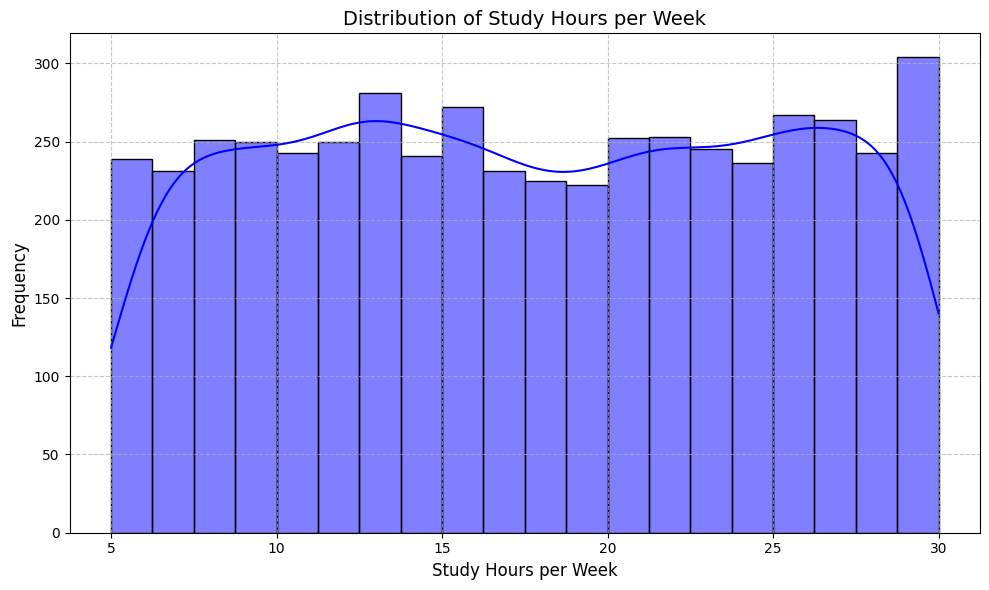

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned_hd['Study_Hours_per_Week'], kde=True, bins=20, color='blue')
plt.title('Distribution of Study Hours per Week', fontsize=14)
plt.xlabel('Study Hours per Week', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Dữ liệu cho thấy học sinh/sinh viên có thói quen học tập rất đa dạng, tập trung chủ yếu ở ba nhóm: **10-15 giờ, 20-25 giờ, và 29 - 30 giờ mỗi tuần.**
- Nhóm học trên **25 - 30 giờ/tuần có phân bố đều nhất và có tần suất gần cao nhất**, cho thấy xu hướng sinh viên thường học từ 20 - 25h/ tuần -> trung bình khoảng 4h/ ngày.
- Có một số nhóm học có tần suất cao: **12h/ tuần, 16h/ tuần và 29h/ tuần**, tương đương với khoảng **1,7h/ ngày, 2h/ ngày và 4.5h/ ngày** -> cho thấy có lượng lớn nhóm sinh viên học ít hơn thời gian trung bình
- Và cũng có sinh viên vô cùng chăm học tận **29 - 30h/ tuần**, và đây là nhóm sinh viên lớn nhất có tới **hơn 300 / 5000** sinh viên

## Mối quan hệ giữa study_hours_per_week và các numeric features

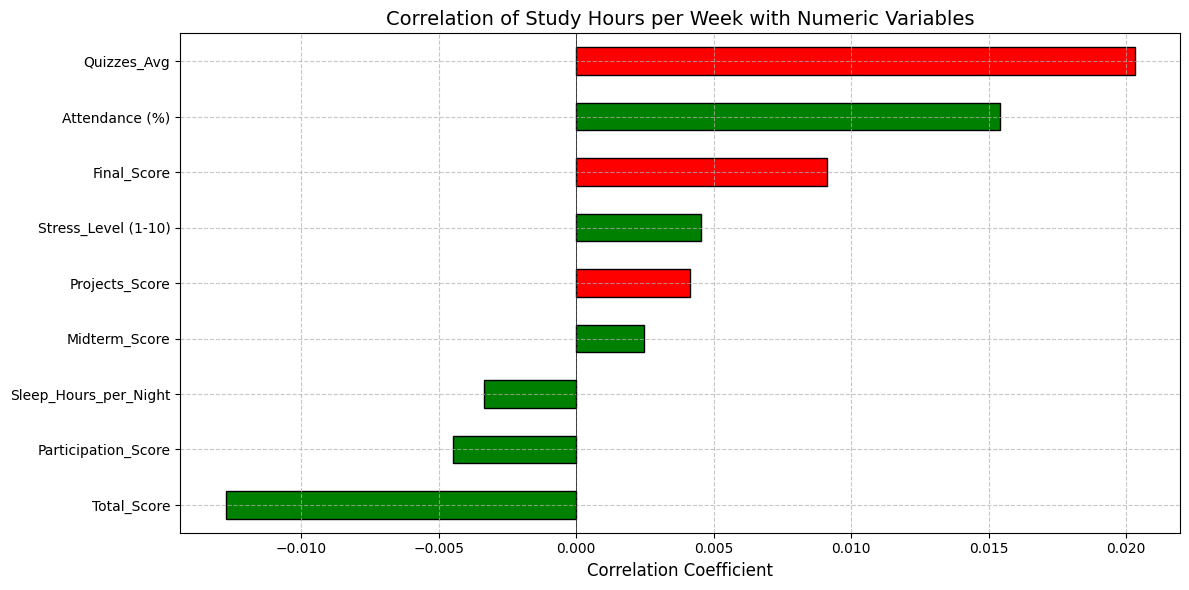

Attendance (%)           0.015398
Midterm_Score            0.002456
Final_Score              0.009137
Quizzes_Avg              0.020306
Participation_Score     -0.004495
Projects_Score           0.004134
Total_Score             -0.012744
Stress_Level (1-10)      0.004551
Sleep_Hours_per_Night   -0.003365
Name: Study_Hours_per_Week, dtype: float64

In [26]:
# Calculate correlations between Study_Hours_per_Week and numeric variables
numeric_vars = [
    'Attendance (%)', 'Midterm_Score', 'Final_Score', 'Quizzes_Avg', 
    'Participation_Score', 'Projects_Score', 'Total_Score', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night']

correlations_with_study = df_hd[numeric_vars + ['Study_Hours_per_Week']].corr()['Study_Hours_per_Week'].drop('Study_Hours_per_Week')

# Visualize these correlations
plt.figure(figsize=(12, 6))
correlations_with_study.sort_values().plot(kind='barh', color=['red' if x < 0 else 'green' for x in correlations_with_study])
plt.title('Correlation of Study Hours per Week with Numeric Variables', fontsize=14)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display correlations
correlations_with_study

**Nhật xét:**
- **study_hours_per_week** có tương quan dương mạnh nhất với **quizzes_avg 0 (0.021)**: Cho thấy rằng sinh viên học càng nhiều thường sẽ thuộc bài và nắm chắc kiến thức trên lớp hơn, điều đó làm cải thiện điểm quiz.
- **study_hours_per_week** có tương quan âm mạnh nhất với **total_score (-0.013)**: Cho thấy rằng sinh viên có xu hướng có nhiều thường sẽ có điểm tổng kết thấp hơn. Điều này hơi mâu thuẫn với tự nhiên, nhưng chỉ ra rằng sinh viên nên học với tới khoảng nhất định, học quá nhiều không đồng nghĩa việc điểm số cũng tăng thêm.
    - Ngưỡng học sẽ được tìm hiểu ở phần sau.
- **study_hours_per_week** còn có tương quan với:
    - **Attendance (0.015)**: sinh viên có giờ học nhiều thường là các sinh viên chăm học, chính vì vậy có xu hướng chăm học, điểm chuyên cần cao hơn.
    - **Stress_level (0.003)**: sinh viên học nhiều bị kiệt sức, hao tổn về sức khỏe, tinh thần, vì vậy áp lực nhiều hơn (áp lực điểm số).
    - **Final_score (0.008), Project score (0.003) và Midterm_score (0.002)**: tương tự như **quizzes**, học nhiều nắm vững kiến thức hơn, tuy nhiên độ tương quan không mạnh.
    - **Participation_score và Sleep_hours_per_night (-0.005)**: có tương quan âm, học nhiều làm sinh viên bị kiệt sức, nên điểm tham dự trên lớp bị kém hơn và học nhiều làm sinh viên ngủ ít hơn.

✅ Như vậy đã trả lời cho câu hỏi **"study_hours_per_week có ảnh hưởng tới các hệ số score như thế nào ?"** và **study_hours_per_week ảnh hưởng tới cuộc sống thể chất (Stress_level, Sleep_hours_per_night) như thế nào ?**.

## Tiếp theo, phân tích mối quan hệ giữa study_hours_per_week và các categorical features

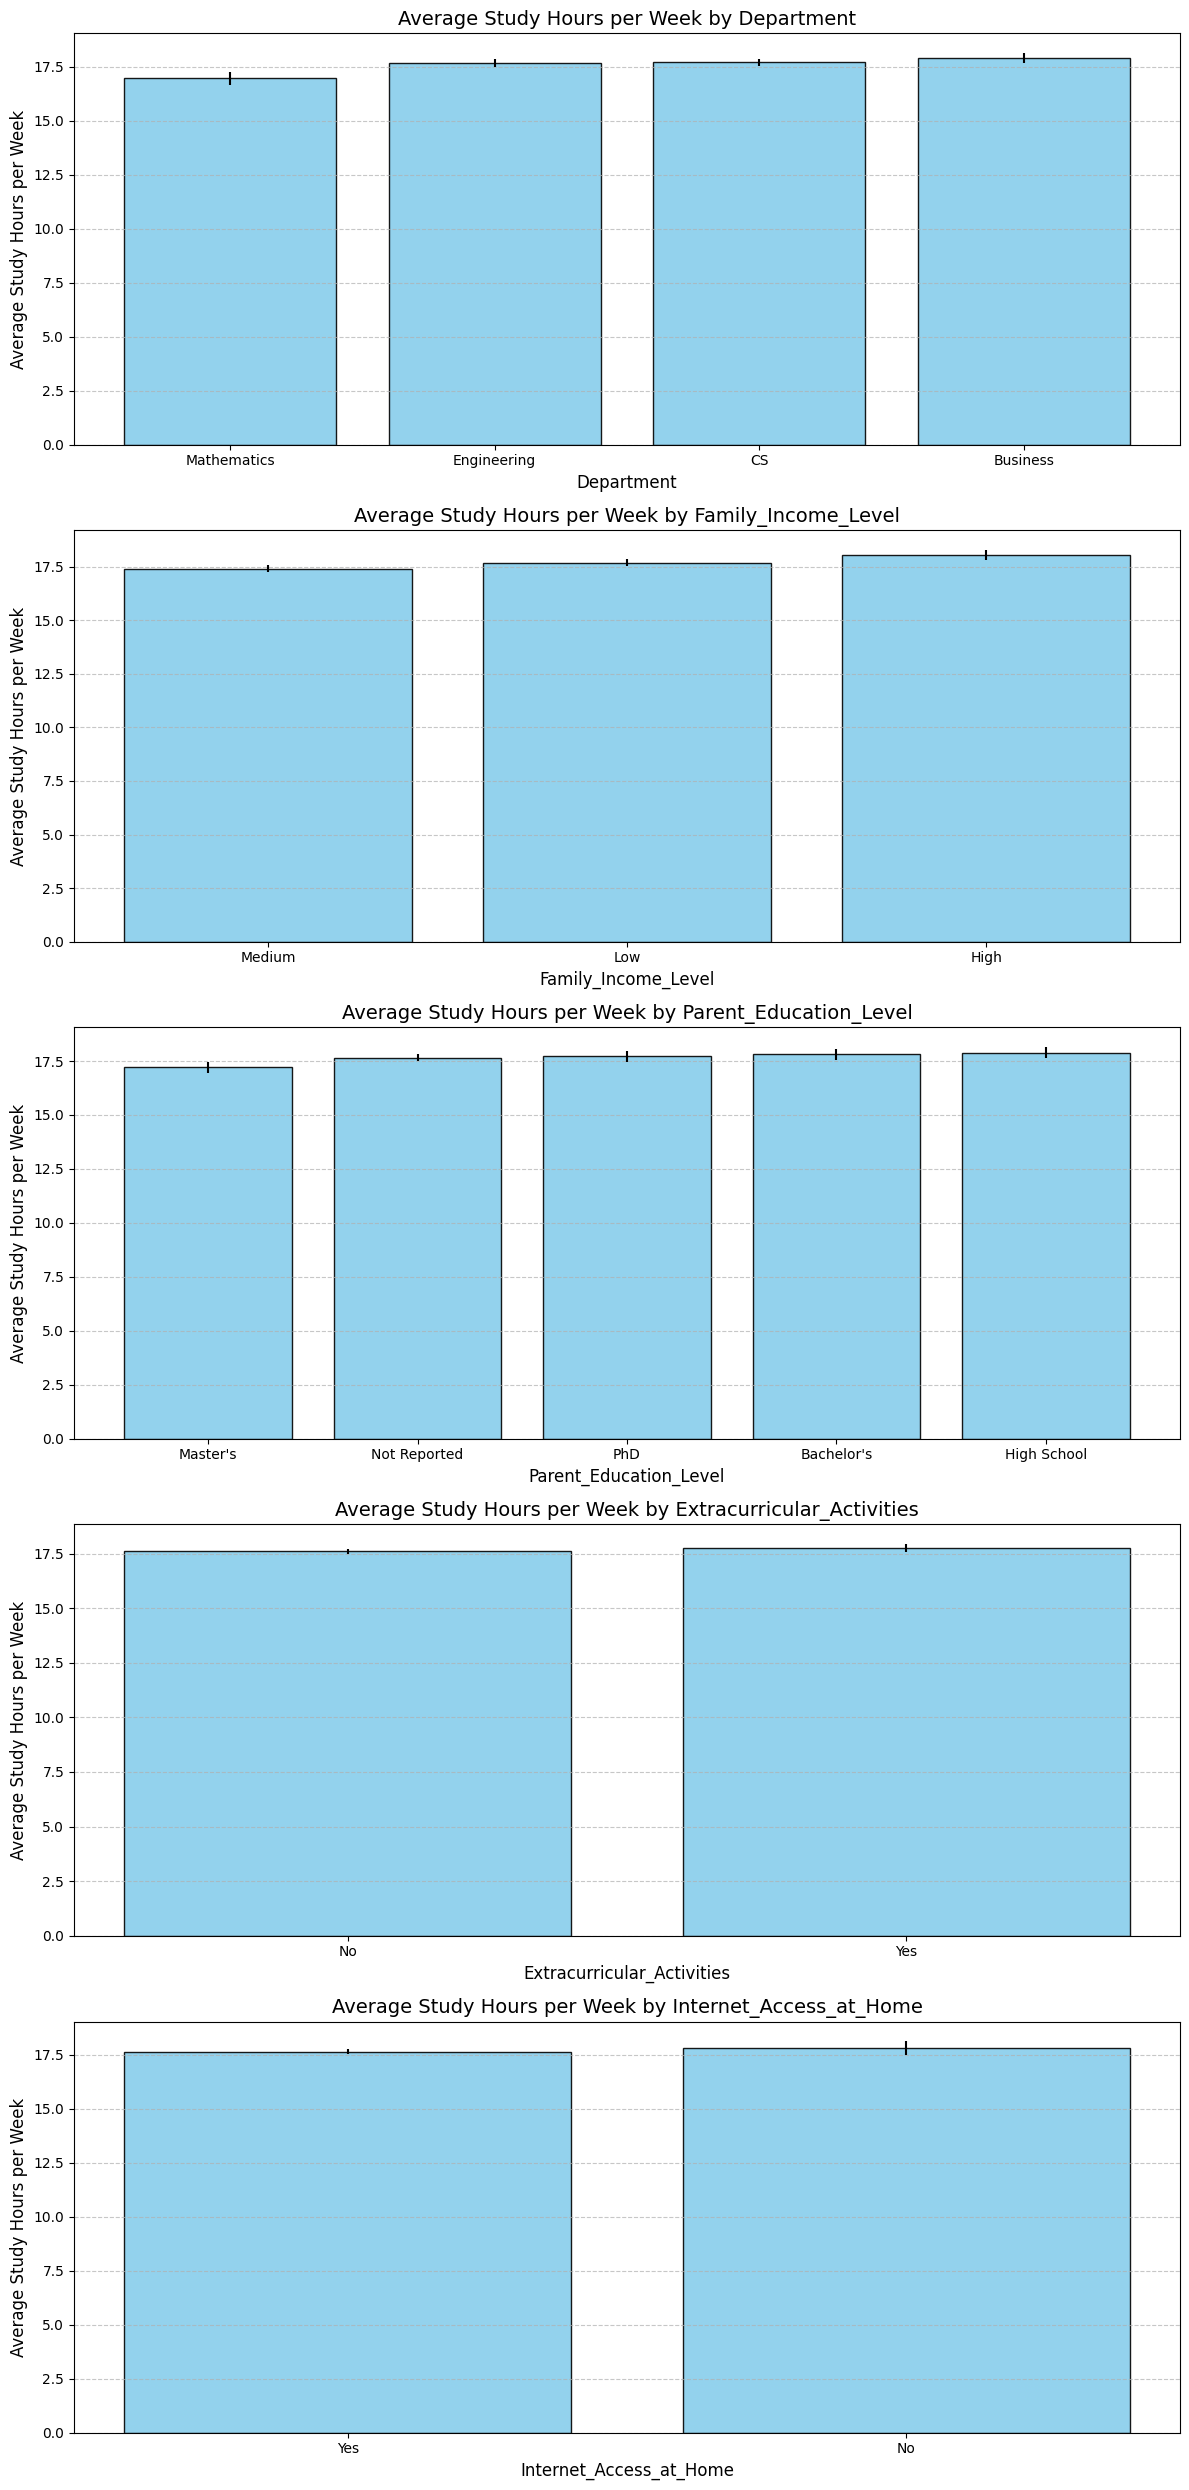

{'Department': Department
 Business       17.906461
 CS             17.703017
 Engineering    17.668550
 Mathematics    16.957853
 Name: Study_Hours_per_Week, dtype: float64,
 'Family_Income_Level': Family_Income_Level
 High      18.066188
 Low       17.691528
 Medium    17.410492
 Name: Study_Hours_per_Week, dtype: float64,
 'Parent_Education_Level': Parent_Education_Level
 Bachelor's      17.806173
 High School     17.887060
 Master's        17.212564
 Not Reported    17.659532
 PhD             17.714878
 Name: Study_Hours_per_Week, dtype: float64,
 'Extracurricular_Activities': Extracurricular_Activities
 No     17.617177
 Yes    17.755474
 Name: Study_Hours_per_Week, dtype: float64,
 'Internet_Access_at_Home': Internet_Access_at_Home
 No     17.806990
 Yes    17.641851
 Name: Study_Hours_per_Week, dtype: float64}

In [27]:
categorical_features = ['Department', 'Family_Income_Level', 'Parent_Education_Level', 
                   'Extracurricular_Activities', 'Internet_Access_at_Home']

# Create bar plots showing average Study_Hours_per_Week for each categorical variable
fig, axes = plt.subplots(len(categorical_features), 1, figsize=(12, 25))

for i, cat_var in enumerate(categorical_features):
    avg_study_hours = df_cleaned_hd.groupby(cat_var)['Study_Hours_per_Week'].mean().sort_values()
    std_errors = df_cleaned_hd.groupby(cat_var)['Study_Hours_per_Week'].sem()
    
    # Create bar plot with error bars
    axes[i].bar(avg_study_hours.index, avg_study_hours.values, yerr=std_errors[avg_study_hours.index], color='skyblue', alpha=0.9)
    axes[i].set_title(f'Average Study Hours per Week by {cat_var}', fontsize=14)
    axes[i].set_xlabel(cat_var, fontsize=12)
    axes[i].set_ylabel('Average Study Hours per Week', fontsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Summarize the average study hours by each category
study_hours_summary = {cat_var: df_cleaned_hd.groupby(cat_var)['Study_Hours_per_Week'].mean() for cat_var in categorical_features}
study_hours_summary

- Theo **Department**:
    - **Business** có số giờ học trung bình cao nhất **(17.9 giờ / tuần)**.
    - **Mathematics** có số giờ học trung bình thấp nhất **(16.96 giờ / tuần)**.
    - **Engineering và Computer Science** có số giờ học trung bình và tương đương nhau **(~17.7 giờ / tuần)**.
    - Sinh viên của các ngành **Business, Engineering và Computer Science** có xu hướng học nhiều hơn, còn ngành **Mathematics** học ít nhất, có thể do chương trình ít yêu cầu hơn.
- Theo **Family_Income_Level**:
    - Sinh viên có **thu nhập gia đình cao** có giờ học trên tuần là cao nhất **(18.07 giờ / tuần)** có thể do điều kiện học tập tốt hơn.
    - Sinh viên có **thu nhập gia đình trung bình và thấp** có giờ học trên tuần không có khác biệt nhiều **(17.41 giờ / tuần và 17.41 giờ/ tuần)**
- Theo **Parent_Education_Level**:
    - Bố mẹ có trình độ **High School** cao nhất **(17.89 giờ/tuần)**, có thể do phụ huynh khuyến khích con cái học tập để cải thiện trình độ.
    - Bố mẹ có trình độ **Master’s** thấp nhất **(17.21 giờ/tuần)**, có thể do kỳ vọng khác biệt.
    - !!!Dữ liệu **Parent_Education_Level** chưa phản ánh thực tế do **Not_reported** còn nhiều.
- Theo **Extracurricular_Activities và Internet_Access_at_Home**:
    - Không có sự khác biệt quá nhiều giữa **Extracurricular_Activities (Yes: 17.76 giờ/ tuần; No: 17.62 giờ/ tuần)** và **Internet_Access_at_Home (Yes: 17.64 giờ/ tuần; No: 17.81 giờ/ tuần)**.
    - Sinh viên tham gia hoạt động ngoại khóa và có Internet ở nhà hay không không làm ảnh hưởng quá nhiều tới thời gian học trên tuần.

✅ Như vậy đã trả lời cho câu hỏi: **"Các sinh viên thuộc nhóm có yếu tố khách quan khác nhau như Department, Family_Income_Level, Parent_Education_Level, Extracurricular_Activities và Internet_Access_at_Home, ... có số giờ học trên tuần khác nhau như thế nào ?""**

## Phân tích mối quan hệ Total Score và Study_Hours_per_Week

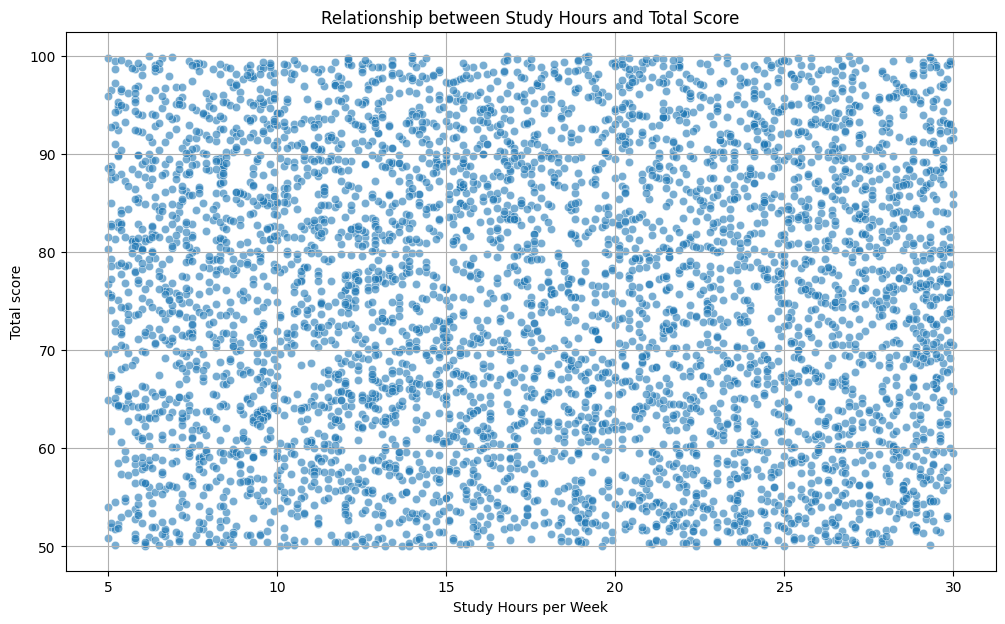

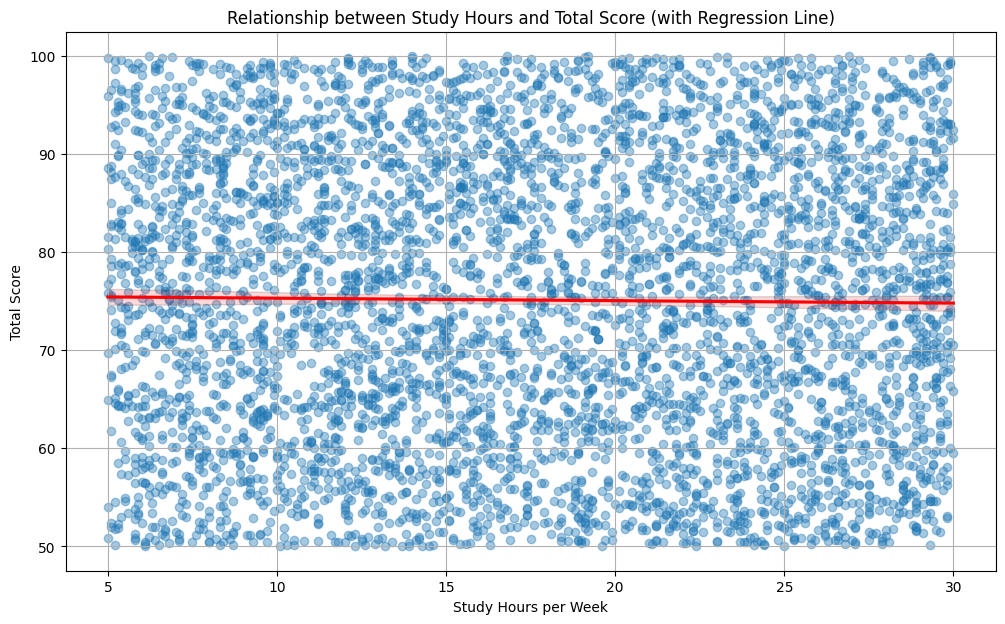

In [28]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Study_Hours_per_Week', y='Total_Score', data=df_hd, alpha=0.6)
plt.title('Relationship between Study Hours and Total Score')
plt.xlabel('Study Hours per Week')
plt.ylabel('Total score')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 7))
sns.regplot(x='Study_Hours_per_Week', y='Total_Score', data=df_hd, scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Relationship between Study Hours and Total Score (with Regression Line)')
plt.xlabel('Study Hours per Week')
plt.ylabel('Total Score')
plt.grid(True)
plt.show()

**Nhận xét**:
- Đồ thị trên là phân bố của **Study_Hours_per_Week** và **Total_Score** theo kiểu Scatter.
- **Regression line** nhìn thì có vẻ nằm ngang, để ý rất kỹ thấy nghiên nhẹ về phía bên phải.
- Để kiểm tra **Regression line** có bị nghiên hay không, dùng **Correlation**.

In [29]:
correlation = df_hd['Study_Hours_per_Week'].corr(df_hd['Total_Score'])
print(f"\nCorrelation between Study hours per week and Total score: {correlation:.4f}")


Correlation between Study hours per week and Total score: -0.0127


Vậy là **correlation = -0.0135 (< 0)**, vậy thì có thể đưa ra kết luận học nhiều sẽ bị điểm thấp.

## Phân tích Study_Hours_per_week của từng nhóm điểm 

/tmp/ipykernel_31/3402235346.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_score_by_study_hours = df_hd.groupby('Study_Hours_Group')['Total_Score'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


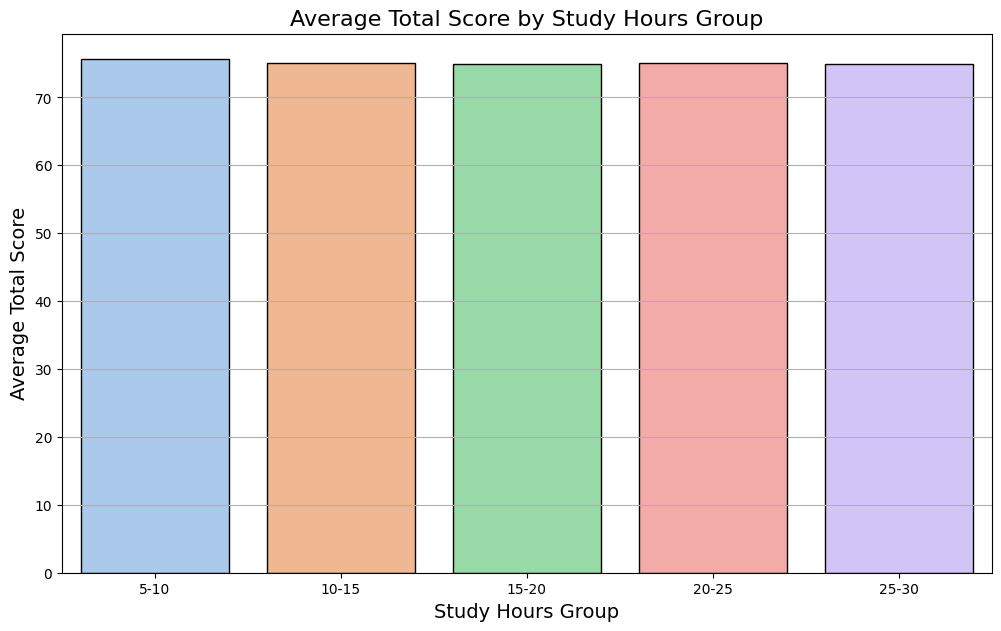

Average Total Score by Study Hours Group:
  Study_Hours_Group  Total_Score
0              5-10    75.599022
1             10-15    74.995862
2             15-20    74.991600
3             20-25    75.108296
4             25-30    74.913044


In [30]:
min_hours = int(df_hd['Study_Hours_per_Week'].min())
max_hours = int(df_hd['Study_Hours_per_Week'].max())
bins = np.arange(min_hours, max_hours + 5, 5)
labels = [f'{i}-{i+5}' for i in bins[:-1]]

df_hd['Study_Hours_Group'] = pd.cut(df_hd['Study_Hours_per_Week'], bins=bins, labels=labels, right=False)

avg_score_by_study_hours = df_hd.groupby('Study_Hours_Group')['Total_Score'].mean().reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(x='Study_Hours_Group', y='Total_Score', data=avg_score_by_study_hours, palette='pastel')
plt.title('Average Total Score by Study Hours Group', fontsize=16)
plt.xlabel('Study Hours Group', fontsize=14)
plt.ylabel('Average Total Score', fontsize=14)
plt.grid(axis='y')
plt.show()

print("Average Total Score by Study Hours Group:")
print(avg_score_by_study_hours)

**Nhận xét**
- Không có sự khác biệt lớn về điểm trung bình giữa các nhóm giờ học.
- Group **6-11 giờ/tuần** có **tổng điểm trung bình cao nhất**. Điều này khá bất ngờ và có thể đi ngược lại với giả định thông thường rằng học nhiều hơn sẽ dẫn đến điểm cao hơn.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


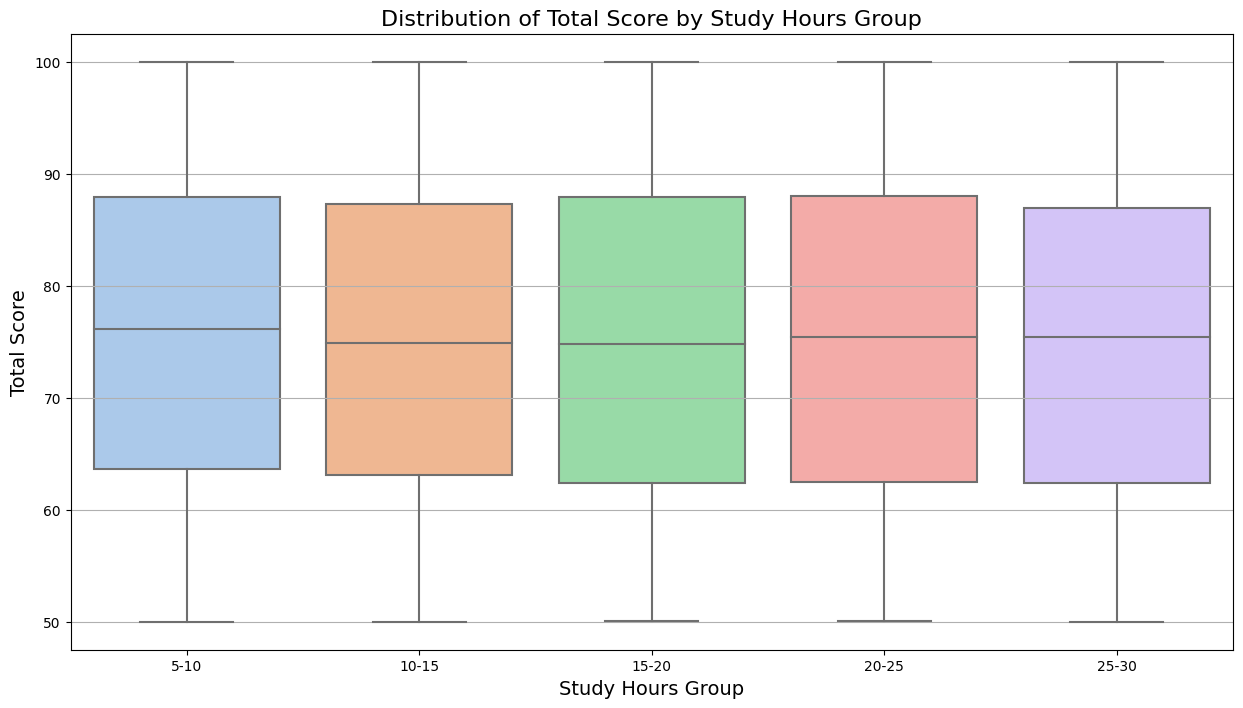

In [31]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Study_Hours_Group', y='Total_Score', data=df_hd, palette='pastel')
plt.title('Distribution of Total Score by Study Hours Group', fontsize=16)
plt.xlabel('Study Hours Group', fontsize=14)
plt.ylabel('Total Score', fontsize=14)
plt.grid(axis='y')
plt.show()

Sau khi phân tích kỹ hơn về phân phối của từng nhóm Study_Hours_per_week, có **kết luận** sau:
- Nhóm học từ **16 - 21 giờ / tuần** có kết quả tốt hơn chút so với các nhóm còn lại, bởi giá trị **max** cao hơn chút mà vẫn giữ được giá trị **mean** tương đối giống với các nhóm khác.
- Sự phân phối của **Total_Score** theo từng nhóm **Study_Hours_per_Week** là không có sự khác biệt quá nhiều cả về **Min, Max, Mean, IQR**.
- **Số giờ học không phải là yếu tố quyết định chính đến tổng điểm**: Có thể các yếu tố khác như chất lượng giờ học, phương pháp học tập, mức độ tập trung, kiến thức nền tảng có ảnh hưởng lớn hơn đến điểm số.

✅ Như vậy đã trả lời cho câu hỏi **"Sinh viên nên học trong khoảng bao nhiêu giờ / tuần để đạt được kết quả cao ?**. Đó là **Số giờ học không quyết định đến tổng điểm**, có sinh viên học ít (6 - 11 tiếng / tuần) đạt được kết quả cao, tuy nhiên nên học trong **16 - 21 giờ / tuần** để đạt được kết quả cao nhất.

# Extracurricular Activities Column (EDA)

#### Chúng ta cùng kiểm tra chỉ số trung bình của Extracurricular Activities

In [32]:
numeric_vars = ['Attendance (%)', 'Midterm_Score', 'Final_Score', 'Quizzes_Avg', 
                'Participation_Score', 'Projects_Score', 'Total_Score', 'Study_Hours_per_Week', 
                'Stress_Level (1-10)', 'Sleep_Hours_per_Night']
avg_by_extra = df.groupby('Extracurricular_Activities')[numeric_vars].mean()

# Display average metrics grouped by Extracurricular Activities
avg_by_extra

Attendance (%)  Midterm_Score  Final_Score  \
Extracurricular_Activities                                               
No                               75.504131      70.664723    69.449468   
Yes                              75.209125      70.766986    69.633680   

                            Quizzes_Avg  Participation_Score  Projects_Score  \
Extracurricular_Activities                                                     
No                            75.046491             4.969642       74.829538   
Yes                           74.627946             5.022846       74.737006   

                            Total_Score  Study_Hours_per_Week  \
Extracurricular_Activities                                      
No                            75.220922             17.439268   
Yes                           74.813535             17.598686   

                            Stress_Level (1-10)  Sleep_Hours_per_Night  
Extracurricular_Activities                                              
No                                     5.542203               6.526809  
Yes                                    5.472532               6.502906

**Nhận xét**
- Dường như có sự khác biệt nhẹ giữa các features của những sinh viên có tham gia và không tham gia hoạt động ngoại khóa
  

#### Chúng ta cùng xem xét mối quan hệ tương quan giữa việc tham giác các hoạt động ngoại khóa và mã hóa 'Extracurricular_Activities' dưới dạng nhị phân

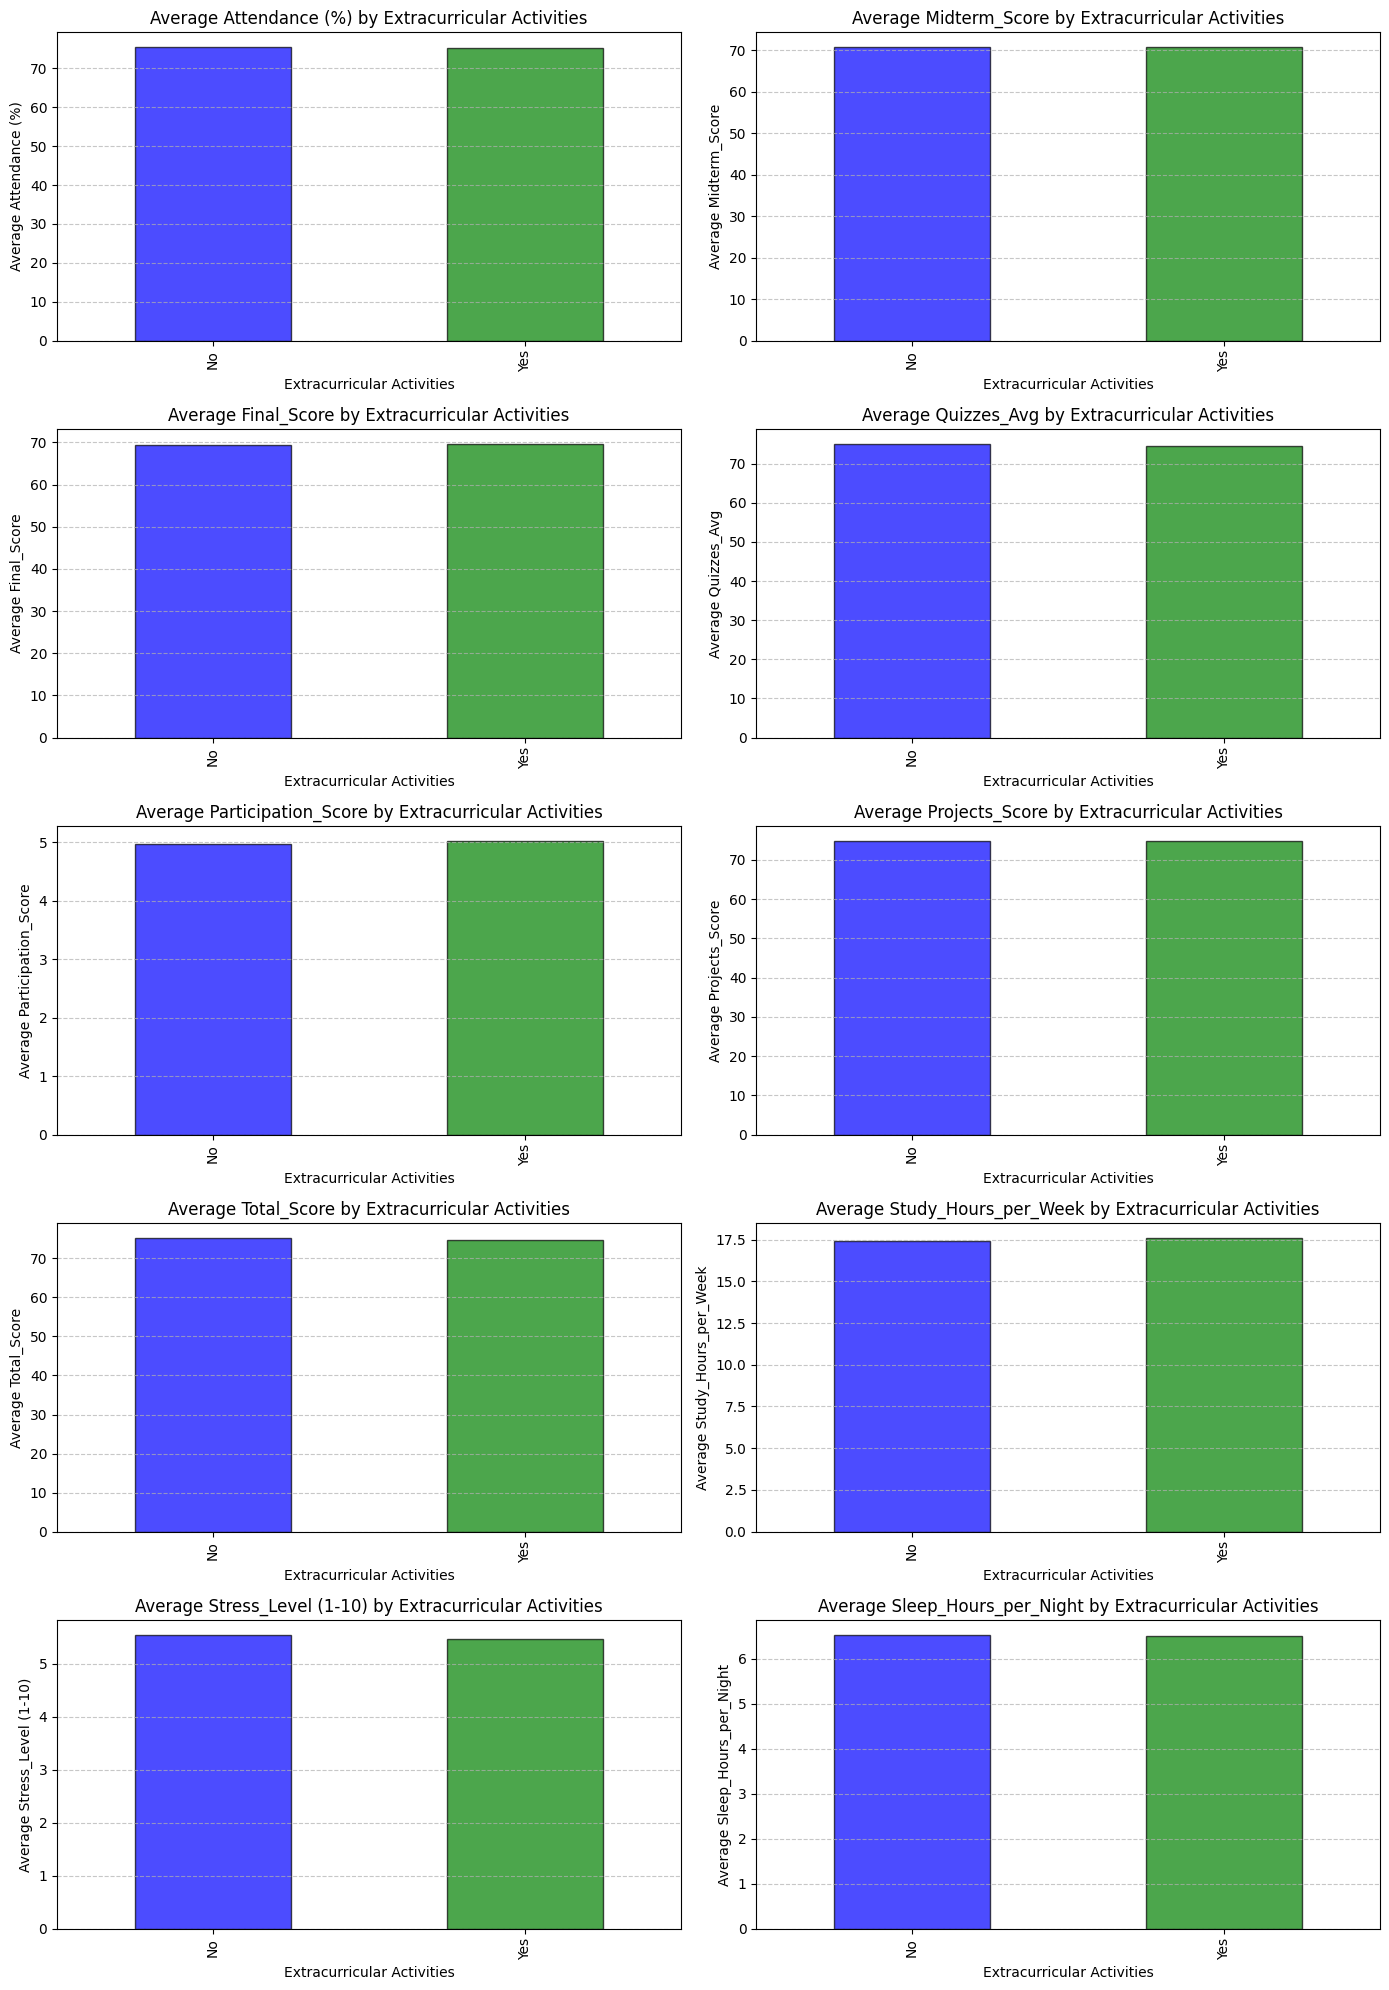

In [33]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 20))
axes = axes.flatten()

for i, metric in enumerate(numeric_vars):
    avg_by_extra[metric].plot(kind='bar', ax=axes[i], color=['blue', 'green'], alpha=0.7)
    axes[i].set_title(f'Average {metric} by Extracurricular Activities', fontsize=12)
    axes[i].set_xlabel('Extracurricular Activities', fontsize=10)
    axes[i].set_ylabel(f'Average {metric}', fontsize=10)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

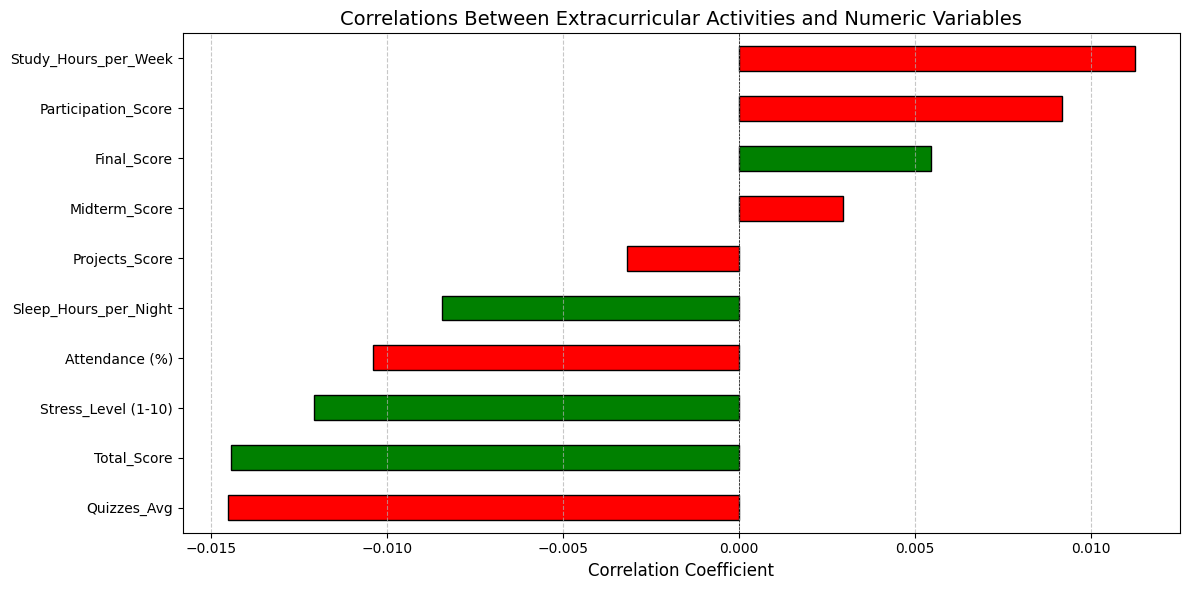

Attendance (%)          -0.010396
Midterm_Score            0.002975
Final_Score              0.005463
Quizzes_Avg             -0.014510
Participation_Score      0.009177
Projects_Score          -0.003182
Total_Score             -0.014425
Study_Hours_per_Week     0.011251
Stress_Level (1-10)     -0.012069
Sleep_Hours_per_Night   -0.008427
Name: Extracurricular_Activities_Binary, dtype: float64

In [34]:
df['Extracurricular_Activities_Binary'] = df['Extracurricular_Activities'].map({'No': 0, 'Yes': 1})

correlations_with_extra = df[numeric_vars + ['Extracurricular_Activities_Binary']].corr()['Extracurricular_Activities_Binary'].drop('Extracurricular_Activities_Binary')

# Visualize these correlations
plt.figure(figsize=(12, 6))
correlations_with_extra.sort_values().plot(kind='barh', color=['red' if x < 0 else 'green' for x in correlations_with_extra])
plt.title('Correlations Between Extracurricular Activities and Numeric Variables', fontsize=14)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

correlations_with_extra

**Nhận xét**
- Cho thấy tỉ lệ cân bằng giữa phân phối 2 nhãn Yes và No trong 'Extracurricular_Activities'
- Correlation tương đối là khá thấp, cho thấy các features khác không có mối tương quan với 'Extracurricular_Activities'
- Thoáng qua có thể đánh giá rằng Extracurricular không có tác động trực tiếp đến các features khác

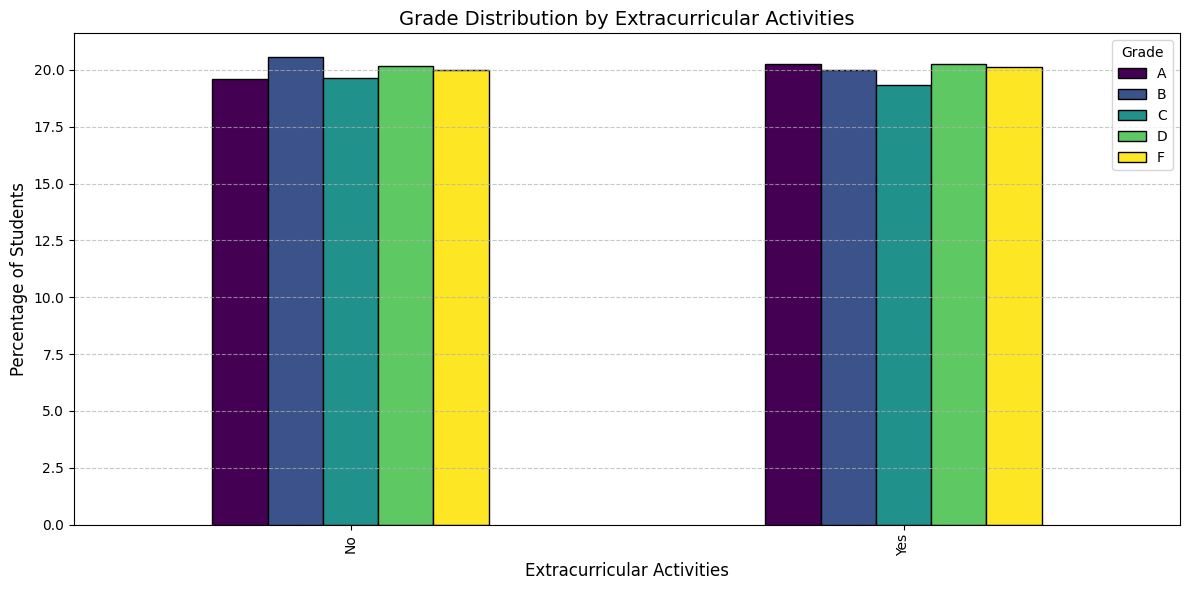

Grade                               A          B          C          D  \
Extracurricular_Activities                                               
No                          19.614148  20.578778  19.654341  20.176849   
Yes                         20.262739  19.984076  19.347134  20.262739   

Grade                               F  
Extracurricular_Activities             
No                          19.975884  
Yes                         20.143312

In [35]:
# Calculate the percentage of each grade for students who participate/do not participate in extracurricular activities
extra_grade_dist = pd.crosstab(df_cleaned['Extracurricular_Activities'], df_cleaned['Grade'], normalize='index') * 100

# Visualize as a grouped bar chart
extra_grade_dist.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Grade Distribution by Extracurricular Activities', fontsize=14)
plt.xlabel('Extracurricular Activities', fontsize=12)
plt.ylabel('Percentage of Students', fontsize=12)
plt.legend(title='Grade')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

extra_grade_dist

### Cụ thể hơn khi xem biểu đồ phân phối giữa 'Extracurricular_Activities' và Grade, chúng ta có thể thấy rằng:
- Các phân phối trên có trend gần như là tương tự nhau
- So các sinh viên tham gia hoạt động ngoại khóa, phân phối sinh viên không tham gia hoạt động ngoại khóa sẽ có xu hướng cao điểm A hơn

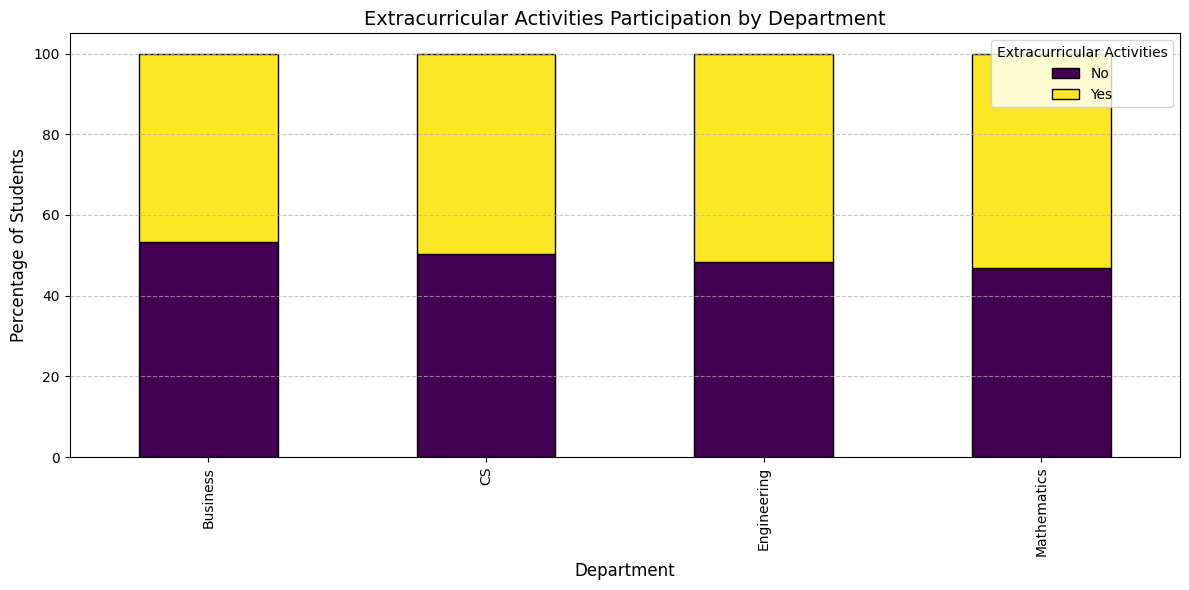

Extracurricular_Activities         No        Yes
Department                                      
Business                    53.243671  46.756329
CS                          50.363196  49.636804
Engineering                 48.430141  51.569859
Mathematics                 46.933769  53.066231

In [36]:
# Calculate the percentage of students participating/not participating in extracurricular activities for each department
dept_extra_dist = pd.crosstab(df_cleaned['Department'], df_cleaned['Extracurricular_Activities'], normalize='index') * 100

# Visualize this distribution as a stacked bar chart
dept_extra_dist.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Extracurricular Activities Participation by Department', fontsize=14)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Percentage of Students', fontsize=12)
plt.legend(title='Extracurricular Activities')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

dept_extra_dist

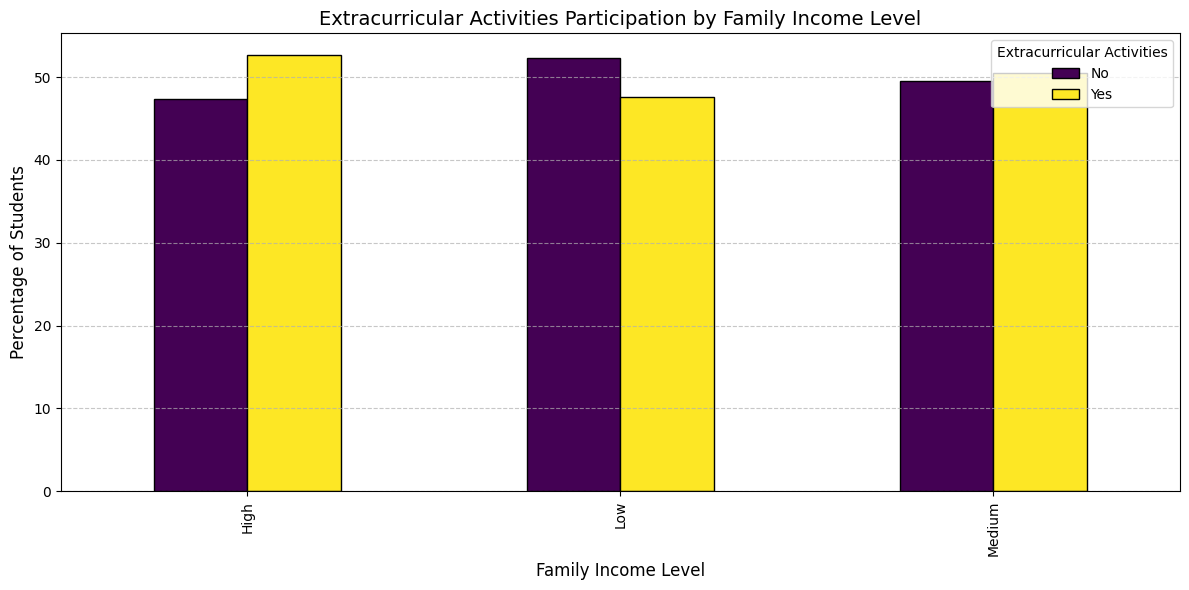

Extracurricular_Activities         No        Yes
Family_Income_Level                             
High                        47.345943  52.654057
Low                         52.341434  47.658566
Medium                      49.522103  50.477897

In [37]:
# Calculate the percentage of students participating/not participating in extracurricular activities for each income level
income_extra_dist = pd.crosstab(df_cleaned['Family_Income_Level'], df_cleaned['Extracurricular_Activities'], normalize='index') * 100

# Visualize this distribution as a grouped bar chart
income_extra_dist.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Extracurricular Activities Participation by Family Income Level', fontsize=14)
plt.xlabel('Family Income Level', fontsize=12)
plt.ylabel('Percentage of Students', fontsize=12)
plt.legend(title='Extracurricular Activities')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

income_extra_dist

**Nhận xét**
- Tỉ lệ sinh viên theo không tham gia hoạt động ngoại khóa có xu hướng nhiều gấp đôi so với sinh viên có tham gia hoạt động ngoại khóa trong Department
- Tương tự như vậy trong Family income, những sinh viên với gia đình thu nhập cao dường như khép kín, không tham gia nhiều hoạt động ngoại khóa
- Tỉ lệ sinh viên không tham gia hoạt động ngoại khóa có thu nhập gia đình cao gấp đôi so với sinh viên có tham gia

# Parent Education Level Column (EDA)

In [38]:
avg_by_parent_edu = df_cleaned.groupby('Parent_Education_Level')[numeric_vars].mean()

# Display average metrics grouped by Parent_Education_Level
avg_by_parent_edu

Attendance (%)  Midterm_Score  Final_Score  \
Parent_Education_Level                                               
Bachelor's                   74.601637      70.507971    70.415176   
High School                  75.825928      70.195048    69.344634   
Master's                     75.979140      71.084440    69.487630   
Not Reported                 75.643698      70.680020    69.443239   
PhD                          74.771670      71.013933    69.022075   

                        Quizzes_Avg  Participation_Score  Projects_Score  \
Parent_Education_Level                                                     
Bachelor's                75.144402             4.930843       75.142510   
High School               75.040180             5.042757       74.703033   
Master's                  74.921570             5.022300       74.342830   
Not Reported              75.131707             4.788273       74.988898   
PhD                       73.951897             5.204348       74.721818   

                        Total_Score  Study_Hours_per_Week  \
Parent_Education_Level                                      
Bachelor's                74.324912             17.786373   
High School               75.057317             17.497243   
Master's                  75.192590             17.292600   
Not Reported              75.246527             17.334341   
PhD                       75.295020             17.691107   

                        Stress_Level (1-10)  Sleep_Hours_per_Night  
Parent_Education_Level                                              
Bachelor's                         5.367647               6.534510  
High School                        5.805938               6.535737  
Master's                           5.483000               6.483500  
Not Reported                       5.516098               6.526732  
PhD                                5.384387               6.492391

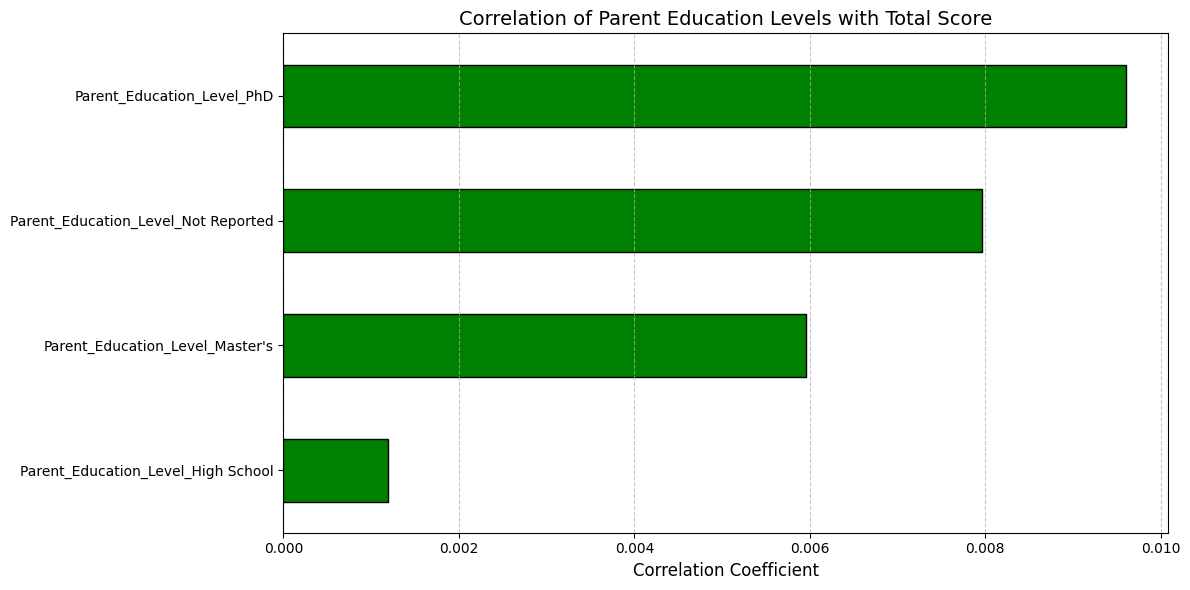

Parent_Education_Level_High School     0.001194
Parent_Education_Level_Master's        0.005960
Parent_Education_Level_Not Reported    0.007966
Parent_Education_Level_PhD             0.009608
dtype: float64

In [39]:
# Using One-Hot Encoding for Parent_Education_Level
df_encoded = pd.get_dummies(df_cleaned, columns=['Parent_Education_Level'], drop_first=True)

# Calculate correlations with Parent Education Level indicators
correlations_parent_edu = df_encoded[[col for col in df_encoded if col.startswith('Parent_Education_Level')]].corrwith(df_encoded['Total_Score'])

# Visualize correlations
plt.figure(figsize=(12, 6))
correlations_parent_edu.sort_values().plot(kind='barh', color=['green' if val > 0 else 'red' for val in correlations_parent_edu])
plt.title('Correlation of Parent Education Levels with Total Score', fontsize=14)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

correlations_parent_edu

**Nhận xét**
- Thoáng qua có thể nhận xét rằng điểm trung bình của sinh viên có bố mẹ học vấn thấp cao hơn so với sinh viên có bố mẹ học vấn cao
- Mối tương quan giữa điểm giữa sinh viên có bố mẹ học vấn thấp và điểm số là không cao và ngược lại

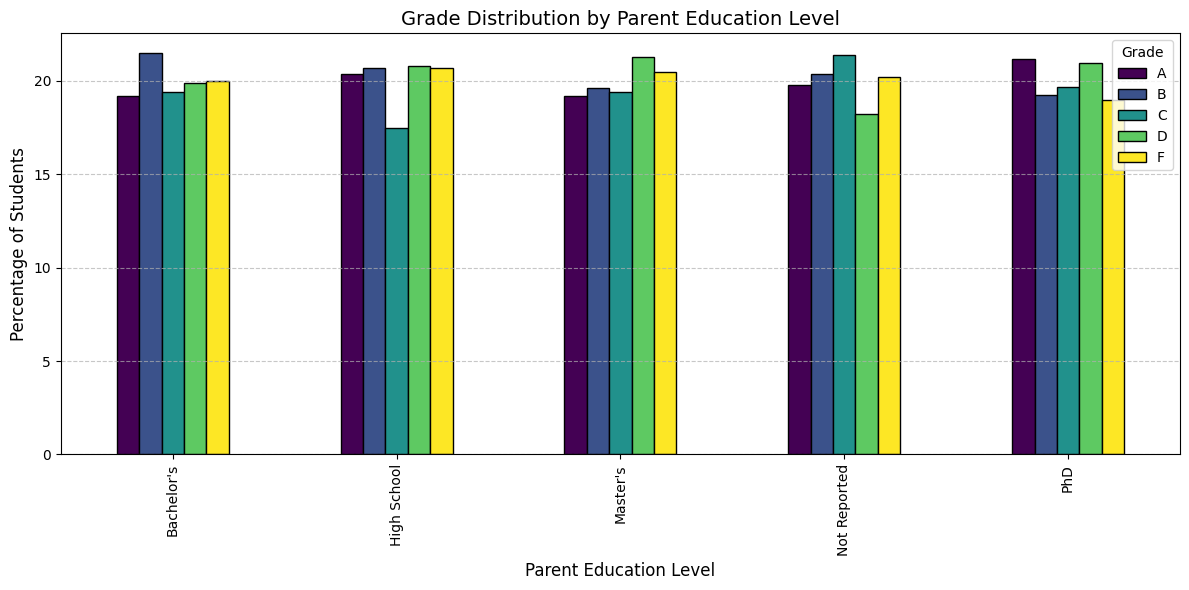

Grade                           A          B          C          D          F
Parent_Education_Level                                                       
Bachelor's              19.215686  21.470588  19.411765  19.901961  20.000000
High School             20.360551  20.678685  17.497349  20.784730  20.678685
Master's                19.200000  19.600000  19.400000  21.300000  20.500000
Not Reported            19.804878  20.390244  21.365854  18.243902  20.195122
PhD                     21.146245  19.268775  19.664032  20.948617  18.972332

In [40]:
# Calculate the percentage of each grade for students based on Parent Education Level
parent_edu_grade_dist = pd.crosstab(df_cleaned['Parent_Education_Level'], df_cleaned['Grade'], normalize='index') * 100

# Visualize as a grouped bar chart
parent_edu_grade_dist.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Grade Distribution by Parent Education Level', fontsize=14)
plt.xlabel('Parent Education Level', fontsize=12)
plt.ylabel('Percentage of Students', fontsize=12)
plt.legend(title='Grade')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

parent_edu_grade_dist

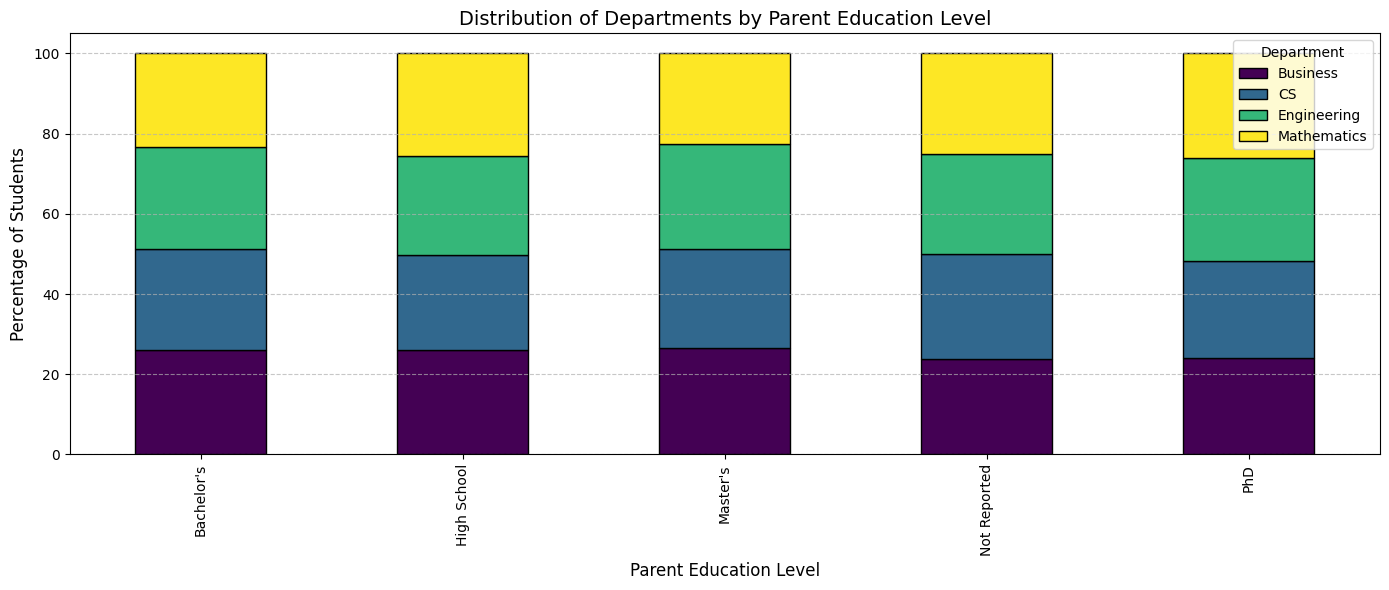

Department               Business         CS  Engineering  Mathematics
Parent_Education_Level                                                
Bachelor's              26.078431  25.098039    25.588235    23.235294
High School             26.086957  23.753977    24.602333    25.556734
Master's                26.500000  24.700000    26.300000    22.500000
Not Reported            23.804878  26.146341    24.975610    25.073171
PhD                     24.011858  24.110672    25.889328    25.988142

In [41]:
# Calculate the percentage of students in each department based on Parent Education Level
dept_parent_edu = pd.crosstab(df_cleaned['Parent_Education_Level'], df_cleaned['Department'], normalize='index') * 100

# Visualize this distribution as a stacked bar chart
dept_parent_edu.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='viridis')
plt.title('Distribution of Departments by Parent Education Level', fontsize=14)
plt.xlabel('Parent Education Level', fontsize=12)
plt.ylabel('Percentage of Students', fontsize=12)
plt.legend(title='Department')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

dept_parent_edu

**Nhận xét**
- Không có sự khác biệt rõ ràng giữa các nhóm sinh viên học Business, CS, Engineering và Mathematics
- Trong đó số điểm của sinh viên có cha mẹ học vấn cao dường như cao hơn so với sinh viên có cha mẹ với học vấn trung bình - thấp

### 📌 Kết luận

🔹 Trình độ học vấn của cha mẹ có **mối tương quan hạn chế** với thành tích học tập và chỉ số hạnh phúc của học sinh.  
🔹 Cha mẹ có bằng **Tiến sĩ (PhD)** thể hiện **một số lợi thế vừa phải** về điểm số và tỷ lệ chuyên cần, nhưng **không có ý nghĩa thống kê**.  
🔹 Cha mẹ có bằng **Thạc sĩ (Master)** liên quan đến **mức độ căng thẳng cao hơn** ở học sinh; trong khi nhóm có cha mẹ có bằng **Cử nhân (Bachelor)** lại học tập **chăm chỉ nhất**.  
🔹 **35,6% dữ liệu "Không báo cáo"** cho thấy **sự cần thiết phải cải thiện phương pháp thu thập dữ liệu**.  

🔹 Các hoạt động ngoại khóa **không cho thấy tác động đáng kể** đến thành tích học tập qua các chỉ số.  
🔹 Phân bố điểm số giữa các nhóm **gần như giống hệt nhau**.  
🔹 Tỷ lệ tham gia **ổn định giữa các khoa và các nhóm thu nhập**.  
🔹 Sự đánh đổi về sức khỏe tinh thần: **Giảm nhẹ mức độ căng thẳng** (-0.07) nhưng **giảm nhẹ thời gian ngủ** (-0.04 giờ).


In [42]:
data

Gender | Age  | Department  | Attendance (%) | Midterm_Score | Final_Score | Assignments_Avg | Quizzes_Avg | Participation_Score | Projects_Score | Total_Score | Grade | Study_Hours_per_Week | Extracurricular_Activities | Internet_Access_at_Home | Parent_Education_Level | Family_Income_Level | Stress_Level (1-10) | Sleep_Hours_per_Night
Female | 22   | Engineering | 52.899         | 55.03         | 57.82       | 84.22           | 74.06       | 3.99                | 85.9           | 56.09       | F     | 6.3                  | 0                          | 1                       | High School            | 1                   | 5                   | 4.7
Male   | 18   | Engineering | 97.27          | 97.121        | 45.8        | 74.81           | 94.24       | 8.32                | 55.65          | 52.4495     | A     | 19                   | 0                          | 1                       | Not Reported           | 1                   | 4                   | 8.8
Male   | 24   | Business    | 57.19          | 67.05         | 93.68       | 67.7            | 85.7        | 5.05                | 73.79          | 70.3        | D     | 20.7                 | 0                          | 1                       | Master's               | 0                   | 6                   | 6.2
Female | 24   | Mathematics | 95.15          | 47.79         | 80.63       | 66.06           | 93.51       | 6.54                | 92.12          | 61.63       | A     | 24.8                 | 1                          | 1                       | High School            | 2                   | 3                   | 6.7
Female | 23   | CS          | 54.18          | 46.59         | 78.89       | 96.85           | 83.7        | 5.97                | 68.42          | 66.13       | F     | 15.4                 | 1                          | 1                       | High School            | 2                   | 2                   | 7.1
Male   | 21   | Engineering | 75.4314        | 78.85         | 43.53       | 71.4            | 52.2        | 6.38                | 67.29          | 62.08       | B     | 8.5                  | 1                          | 1                       | PhD                    | 2                   | 1                   | 5
Male   | 24   | Business    | 57.6           | 66.26         | 89.07       | 84.52           | 98.4        | 2.3                 | 93.65          | 83.21       | F     | 21.3                 | 0                          | 1                       | Not Reported           | 0                   | 5                   | 6.4
Male   | 19   | Engineering | 52.899         | 45.67         | 73.96       | 80.12           | 95.9        | 3.73                | 93.24          | 81.93       | F     | 27.3                 | 1                          | 0                       | Not Reported           | 1                   | 4                   | 4.3
Female | 21   | CS          | 85.97          | 84.42         | 90.87       | 57.05           | 56.33       | 0.51                | 94.01          | 95.62       | A     | 8                    | 0                          | 0                       | Bachelor's             | 0                   | 9                   | 8.8
Female | 22   | Engineering | 64.01          | 87.96         | 96.79       | 96.98           | 55.63       | 5.88                | 78.6           | 84.99       | A     | 9.6                  | 0                          | 1                       | Not Reported           | 1                   | 10                  | 6.4
... (4990 rows omitted)

Hãy coi các tham số như tỷ lệ điểm danh, điểm giữa kỳ, điểm cuối kỳ, bài kiểm tra, số giờ học, hoạt động ngoại khóa, thu nhập gia đình, v.v. là các yếu tố cần xem xét. Mục tiêu của tôi trong bước này là xác định các tham số phù hợp cho từng khoa, sao cho chúng đáp ứng mục tiêu chính là đạt được điểm tổng kết cao.

🎓 **Thông Tin Học Tập**
- **Các yếu tố liên quan đến hiệu suất học tập:**

  - **Attendance (%):** Tỷ lệ tham gia lớp học (phản ánh mức độ cam kết trong học tập)
  - **Midterm_Score:** Điểm thi giữa kỳ
  - **Final_Score:** Điểm thi cuối kỳ
  - **Assignments_Avg:** Điểm trung bình của các bài tập
  - **Quizzes_Avg:** Điểm trung bình của các bài kiểm tra
  - **Participation_Score:** Mức độ tham gia lớp học
  - **Projects_Score:** Điểm đánh giá dự án
  - **Total_Score:** Tổng điểm (tổng hợp từ các yếu tố khác nhau)
  - **Grade:** Điểm chữ (A, B, C, D, F)
  - **Study_Hours_per_Week:** Số giờ học trung bình mỗi tuần

🧘‍♀️ **Yếu Tố Lối Sống và Bối Cảnh**
- **Các yếu tố liên quan đến lối sống và bối cảnh bên ngoài:**

  - **Gender:** Giới tính (yếu tố nhân khẩu học)
  - **Age:** Tuổi của sinh viên
  - **Department:** Khoa học thuật (có thể ảnh hưởng đến phương pháp học tập)
  - **Extracurricular_Activities:** Tham gia các hoạt động ngoại khóa (có thể ảnh hưởng đến quản lý thời gian và kỹ năng mềm)
  - **Internet_Access_at_Home:** Truy cập internet tại nhà
  - **Parent_Education_Level:** Trình độ học vấn cao nhất của phụ huynh
  - **Family_Income_Level:** Mức thu nhập của gia đình (có thể ảnh hưởng đến điều kiện học tập)
  - **Stress_Level (1-10):** Mức độ căng thẳng tự báo cáo (thang điểm từ 1 đến 10)
  - **Sleep_Hours_per_Night:** Số giờ ngủ trung bình mỗi đêm


In [43]:
departments = np.unique(data.column('Department'))
print(departments)
business_dp = data.where('Department', 'Business')
cs_dp = data.where('Department', 'CS')
engineer_dp = data.where('Department', 'Engineering')
math_dp = data.where('Department', 'Mathematics')

print(business_dp.num_rows)
print(cs_dp.num_rows)
print(engineer_dp.num_rows)
print(math_dp.num_rows)

if sum(make_array(business_dp.num_rows, cs_dp.num_rows,engineer_dp.num_rows,math_dp.num_rows)) == data.num_rows:
    print('Chia thành công')
else:
    print('failed af')

['Business' 'CS' 'Engineering' 'Mathematics']
1006
2022
1469
503
Chia thành công


In [44]:
# 🎓 Academic-related features
academic_features = np.array([
    "Department",
    "Midterm_Score",
    "Final_Score",
    "Assignments_Avg",
    "Quizzes_Avg",
    "Participation_Score",
    "Projects_Score",
    "Total_Score",
    "Grade",

])

# 🧘‍♀️ Lifestyle/contextual features
lifestyle_features = np.array([
    "Gender",
    "Age",
    "Department",
    "Attendance (%)",
    "Extracurricular_Activities",
    "Internet_Access_at_Home",
    "Parent_Education_Level",
    "Family_Income_Level",
    "Stress_Level (1-10)",
    "Sleep_Hours_per_Night",
    "Study_Hours_per_Week"
])


Phần báo cáo này sẽ tập trung vào việc phân tích nhóm sinh viên học ngành Business

In [45]:
import numpy as np

def standard_units(arr):

    # Nếu là kiểu chuỗi số, chuyển về float
    if arr.dtype == object or np.issubdtype(arr.dtype, np.str_):
        try:
            arr = arr.astype(float)
        except ValueError:
            raise ValueError("Mảng chứa chuỗi không thể chuyển thành số.")

    # Chuẩn hóa
    return (arr - np.mean(arr)) / np.std(arr)


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


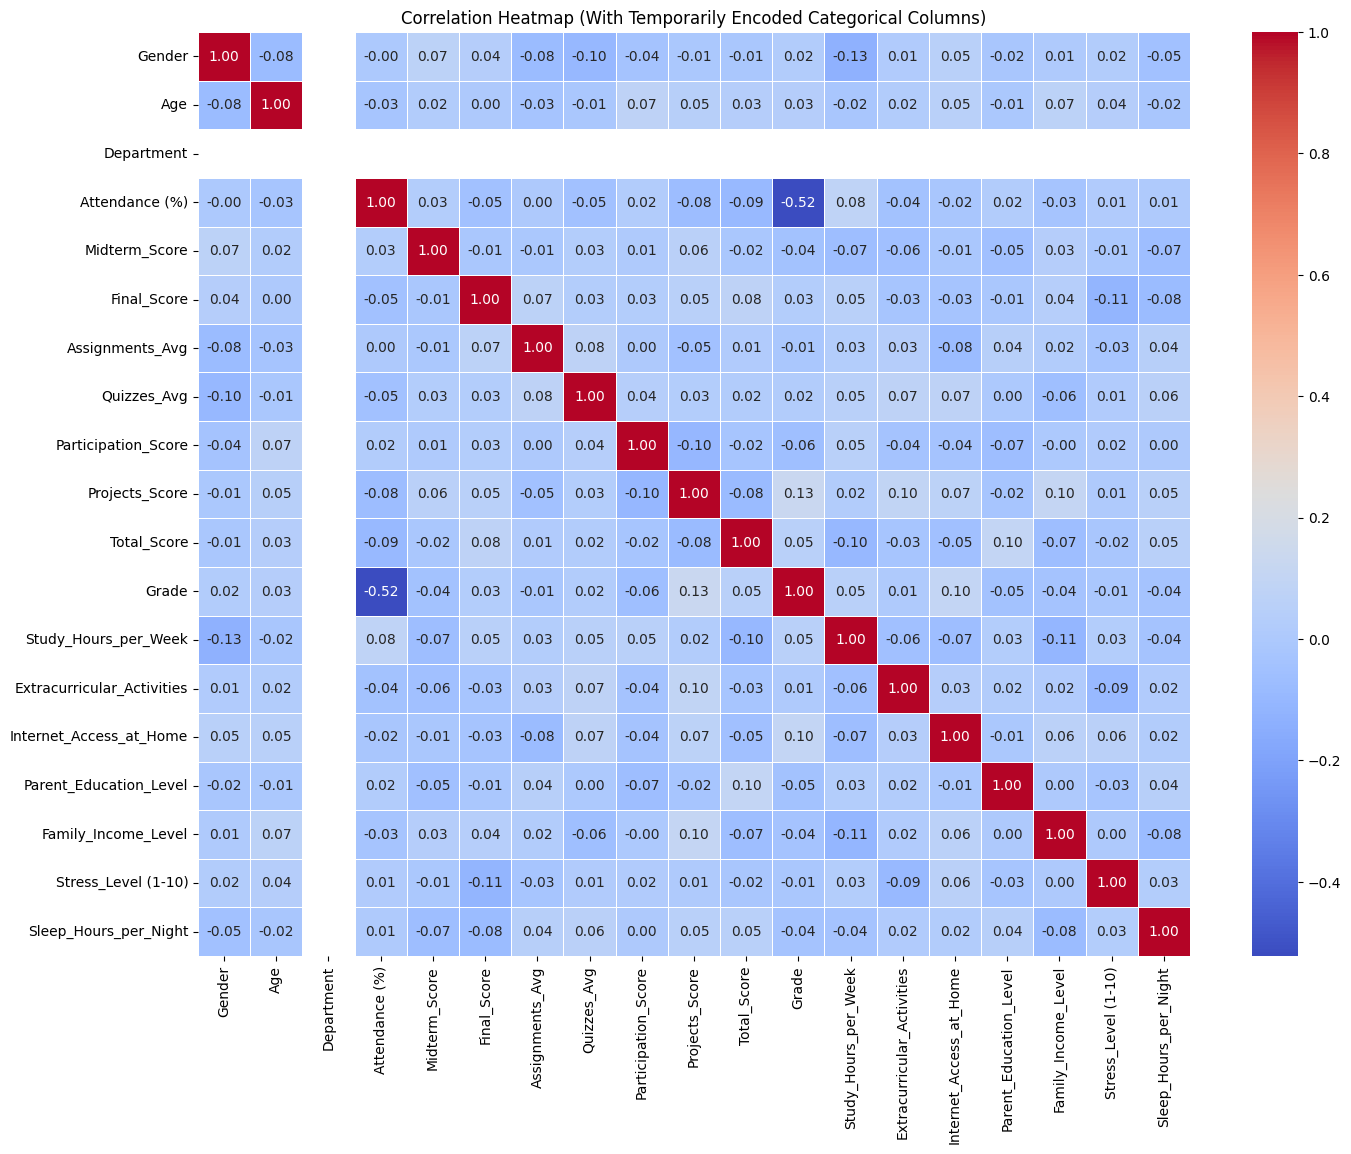

🔍 Top Correlated Column Pairs:
                   Feature 1               Feature 2  Correlation
68            Attendance (%)                   Grade    -0.522328
228     Study_Hours_per_Week                  Gender    -0.130978
182           Projects_Score                   Grade     0.127378
112              Final_Score     Stress_Level (1-10)    -0.112644
244     Study_Hours_per_Week     Family_Income_Level    -0.110171
179           Projects_Score     Participation_Score    -0.104681
187           Projects_Score     Family_Income_Level     0.104247
205              Total_Score  Parent_Education_Level     0.100856
277  Internet_Access_at_Home                   Grade     0.096359
202              Total_Score    Study_Hours_per_Week    -0.096257


In [46]:
# Copy table to avoid modifying the original
temp = math_dp.copy()

# Convert to NumPy array
column_labels = temp.labels
data = temp.to_df().copy()  # needed for LabelEncoder temporarily

# Apply Label Encoding on categorical columns
label_encoders = {}
for col in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Compute correlation matrix
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (With Temporarily Encoded Categorical Columns)")
plt.show()

# Flatten correlation matrix to get pairs
corr_unstacked = correlation_matrix.unstack().reset_index()
corr_unstacked.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Remove self-correlations
filtered_corr = corr_unstacked[corr_unstacked['Feature 1'] != corr_unstacked['Feature 2']]

# Sort by absolute correlation
filtered_corr = filtered_corr.reindex(filtered_corr['Correlation'].abs().sort_values(ascending=False).index)

# Drop duplicates (since correlation is symmetric)
filtered_corr = filtered_corr.iloc[::2]

# Show top correlated pairs
print("🔍 Top Correlated Column Pairs:")
print(filtered_corr.head(10))


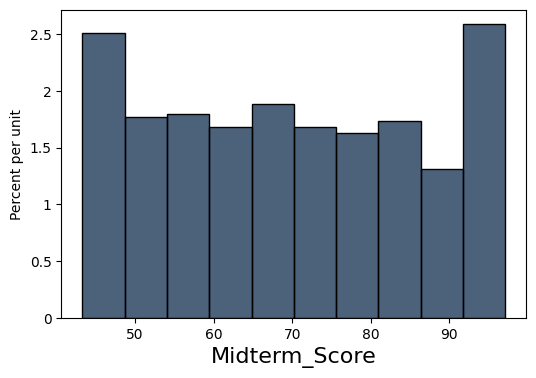

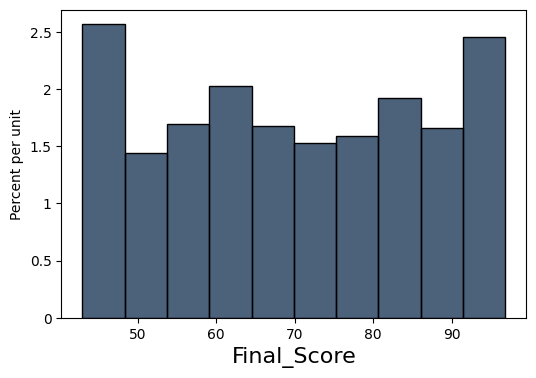

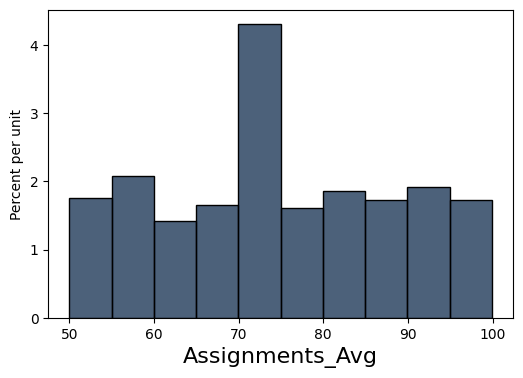

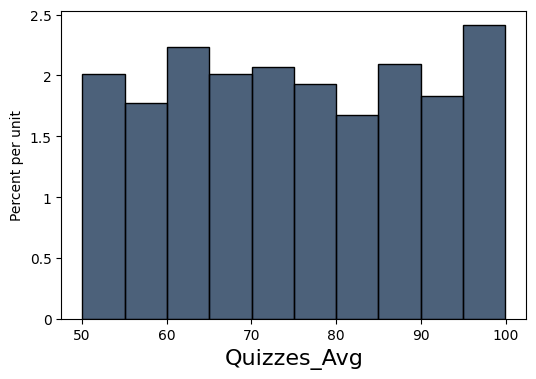

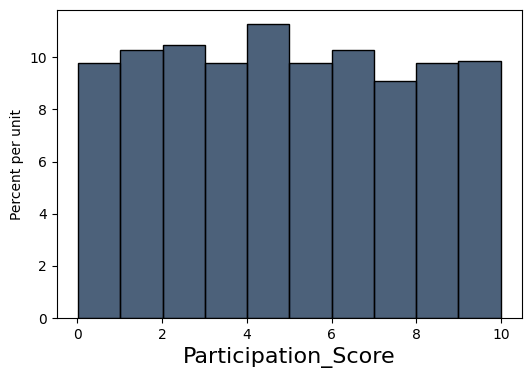

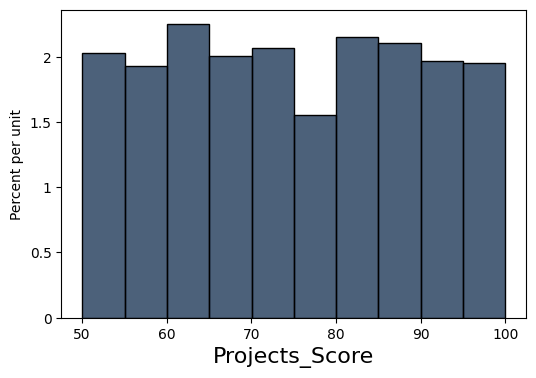

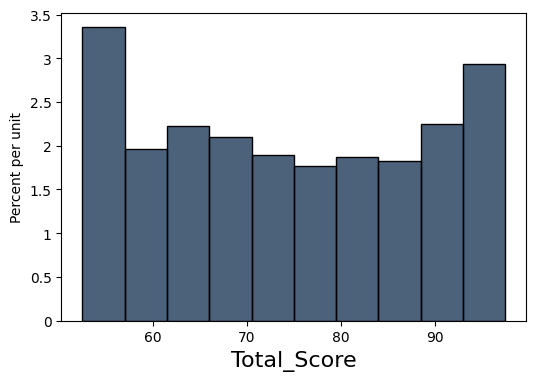

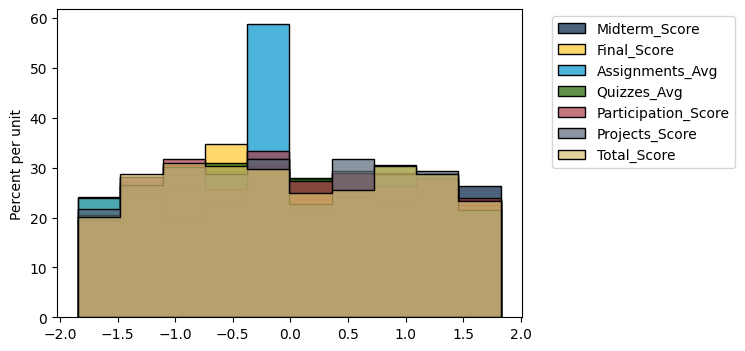

In [47]:
score_bin = np.arange(0,100, 10)

business_dp_af = business_dp.select(

    "Midterm_Score",
    "Final_Score",
    "Assignments_Avg",
    "Quizzes_Avg",
    "Participation_Score",
    "Projects_Score",
    "Total_Score")

business_dp_af_su = Table().with_columns(

    "Midterm_Score", standard_units( business_dp_af.column("Midterm_Score")),
    "Final_Score", standard_units ( business_dp_af.column("Final_Score")),
    "Assignments_Avg", standard_units (business_dp_af.column("Assignments_Avg")),
    "Quizzes_Avg", standard_units ( business_dp_af.column("Quizzes_Avg")),
    "Participation_Score", standard_units ( business_dp_af.column("Participation_Score")),
    "Projects_Score", standard_units ( business_dp_af.column("Projects_Score")),
    "Total_Score", standard_units ( business_dp_af.column("Total_Score")),
)

column_labels = make_array(
    "Midterm_Score",
    "Final_Score",
    "Assignments_Avg",
    "Quizzes_Avg",
    "Participation_Score",
    "Projects_Score",
    "Total_Score")

for c in column_labels:
    business_dp_af.select(c).hist()
business_dp_af_su.hist()

In [48]:
diff_fin_mid_score = (business_dp.column("Midterm_Score") - business_dp.column("Final_Score"))
p_value = np.count_nonzero(diff_fin_mid_score < 40) / len(diff_fin_mid_score)
print(p_value)

a = np.count_nonzero(diff_fin_mid_score >= 0) / len(diff_fin_mid_score)
print(a)

0.9502982107355865
0.4870775347912525


Mặc dù phân phối của midterm và final score tương tự nhau, nhưng phân tích cho thấy một xu hướng thú vị: những sinh viên có điểm thấp trong bài thi giữa kỳ có khả năng "lật kèo" trong kỳ thi cuối kỳ. Cụ thể, hơn 50% sinh viên có điểm final cao hơn điểm midterm, cho thấy sự cải thiện đáng kể trong kết quả thi cuối kỳ.

Mục tiêu của việc phân tích điểm là cá nhân hóa phương pháp tính tổng kết điểm cho từng khoa, giúp đơn giản hóa bài toán tổng thể. Từ đó, việc xây dựng một lối sống tối ưu để đạt được điểm tổng kết mong muốn cũng sẽ có cơ sở vững chắc, tạo điều kiện thuận lợi cho quá trình triển khai.

In [49]:
score_bin = np.arange(0,100, 10)

business_dp_af = business_dp.select(
    "Attendance (%)",
    "Midterm_Score",
    "Final_Score",
    "Assignments_Avg",
    "Quizzes_Avg",
    "Participation_Score",
    "Projects_Score",
    "Total_Score")

business_dp_af_su = Table().with_columns(
    "Attendance (%)", standard_units(business_dp_af.column("Attendance (%)")),
    "Midterm_Score", standard_units( business_dp_af.column("Midterm_Score")),
    "Final_Score", standard_units ( business_dp_af.column("Final_Score")),
    "Assignments_Avg", standard_units (business_dp_af.column("Assignments_Avg")),
    "Quizzes_Avg", standard_units ( business_dp_af.column("Quizzes_Avg")),
    "Participation_Score", standard_units ( business_dp_af.column("Participation_Score")),
    "Projects_Score", standard_units ( business_dp_af.column("Projects_Score")),
    "Total_Score", standard_units ( business_dp_af.column("Total_Score")),
)

column_labels = make_array(
    "Midterm_Score",
    "Final_Score",
    "Assignments_Avg",
    "Quizzes_Avg",
    "Participation_Score",
    "Projects_Score",
    "Total_Score")



Mục tiêu là tận dụng điểm số của sinh viên để tìm ra giải pháp tối ưu cho việc tính tổng kết điểm từ tất cả các nhiệm vụ mà sinh viên thực hiện. Phương pháp hiện tại hướng tới việc xác định cách để tối ưu điểm tổng thể cho từng sinh viên, dựa trên kết quả của các hoạt động học tập.

In [50]:
business_dp_score = business_dp.select(column_labels)
total_score = make_array(0)

for i in column_labels:
    total_score = total_score + business_dp_score.column(i)

business_dp_total_score = business_dp.with_column('Sum Score', total_score).drop(column_labels).drop('Grade')
business_dp_total_score

Gender | Age  | Department | Attendance (%) | Study_Hours_per_Week | Extracurricular_Activities | Internet_Access_at_Home | Parent_Education_Level | Family_Income_Level | Stress_Level (1-10) | Sleep_Hours_per_Night | Sum Score
Male   | 24   | Business   | 57.19          | 20.7                 | 0                          | 1                       | Master's               | 0                   | 6                   | 6.2                   | 463.27
Male   | 24   | Business   | 57.6           | 21.3                 | 0                          | 1                       | Not Reported           | 0                   | 5                   | 6.4                   | 517.41
Male   | 18   | Business   | 96.61          | 22.8                 | 0                          | 1                       | Not Reported           | 1                   | 10                  | 7.9                   | 423.81
Female | 23   | Business   | 80.22          | 6.3                  | 0                          | 0                       | PhD                    | 1                   | 10                  | 7.6                   | 430.81
Male   | 22   | Business   | 72.01          | 19.8                 | 0                          | 1                       | Not Reported           | 0                   | 8                   | 7.5                   | 477.07
Male   | 18   | Business   | 52.899         | 23.5                 | 0                          | 1                       | High School            | 2                   | 3                   | 5.6                   | 413.67
Male   | 18   | Business   | 70.59          | 12.1                 | 1                          | 1                       | Not Reported           | 1                   | 2                   | 7.3                   | 471.103
Female | 21   | Business   | 54.84          | 11.2                 | 1                          | 1                       | Bachelor's             | 0                   | 3                   | 4.2                   | 464.36
Female | 21   | Business   | 52.899         | 6.3                  | 0                          | 1                       | Master's               | 0                   | 1                   | 5.6                   | 455.72
Male   | 24   | Business   | 59.36          | 28.9                 | 0                          | 1                       | PhD                    | 0                   | 7                   | 8.3                   | 431.68
... (996 rows omitted)

Hiện tại, chúng ta đã xây dựng được một bảng dữ liệu hoàn chỉnh, chỉ bao gồm lối sống của sinh viên và kết quả học tập của họ tại trường.

In [51]:
business_dp_total_score.select('Family_Income_Level', 'Study_Hours_per_Week', 'Sleep_Hours_per_Night', 'Sum Score', 'Stress_Level (1-10)', 'Extracurricular_Activities').group('Family_Income_Level', np.average)

Family_Income_Level | Study_Hours_per_Week average | Sleep_Hours_per_Night average | Sum Score average | Stress_Level (1-10) average | Extracurricular_Activities average
0                   | 18.0995                      | 6.46422                       | 445.542           | 5.40931                     | 0.284314
1                   | 17.4129                      | 6.54306                       | 444.949           | 5.53828                     | 0.311005
2                   | 18.5856                      | 6.62278                       | 440.544           | 5.65                        | 0.3

In [52]:
print('Proportion of wealthy family: ' + str(180/(408+180+418) * 100))
business_dp_total_score.select('Family_Income_Level').group('Family_Income_Level')

Proportion of wealthy family: 17.892644135188867


Family_Income_Level | count
0                   | 408
1                   | 418
2                   | 180

Phần lớn các gia đình có con em học ngành Business có mức thu nhập từ thấp đến trung bình, chỉ khoảng 17.89% là thuộc diện khá giả.

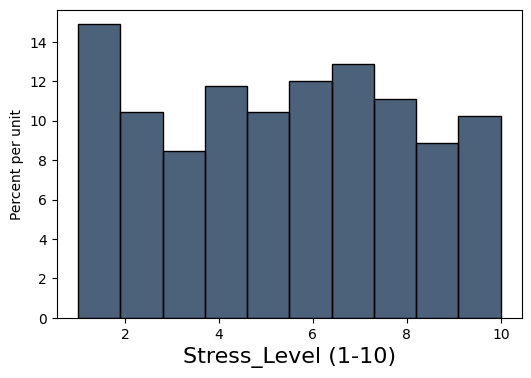

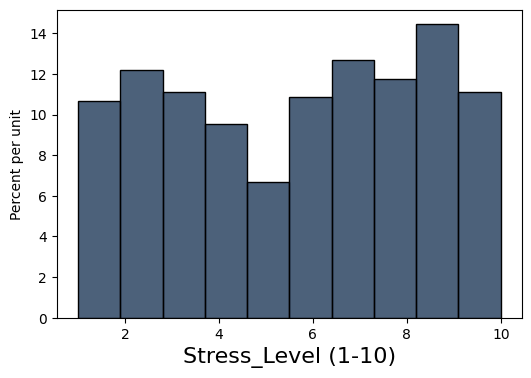

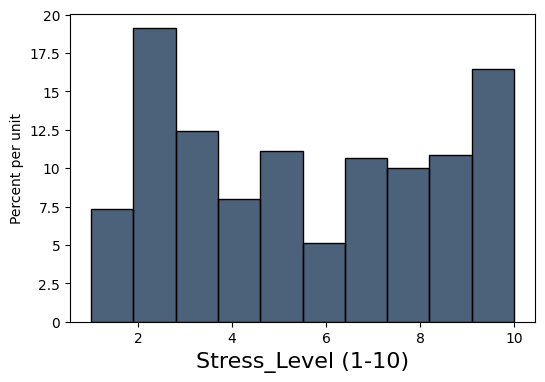

In [53]:
business_dp_total_score.where('Family_Income_Level', 0).select('Stress_Level (1-10)').sample(500, with_replacement=True).hist()
business_dp_total_score.where('Family_Income_Level', 1).select('Stress_Level (1-10)').sample(500, with_replacement=True).hist()
business_dp_total_score.where('Family_Income_Level', 2).select('Stress_Level (1-10)').sample(500, with_replacement=True).hist()

- Các sinh viên có gia đình giàu có được chia thành hai nhóm rõ rệt: Một nhóm có mức độ stress thấp hơn đáng kể, sống khá thư giãn so với những gia đình có thu nhập trung bình khá, trong khi nhóm còn lại lại trải qua mức độ stress cao hơn hẳn. Nói chung, có thể thấy rằng sinh viên thuộc gia đình khá giả thường hoặc rất chill, hoặc cực kỳ stress, trong khi những sinh viên có mức độ stress trung bình thì chiếm rất ít.

- Tuy nhiên, một điểm cần lưu ý là rất hiếm sinh viên thực sự có mức stress level ở mức từ 0 - 1.

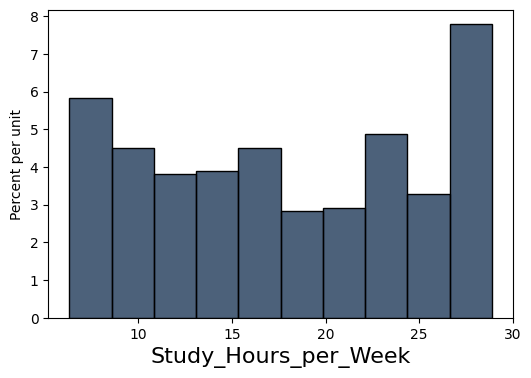

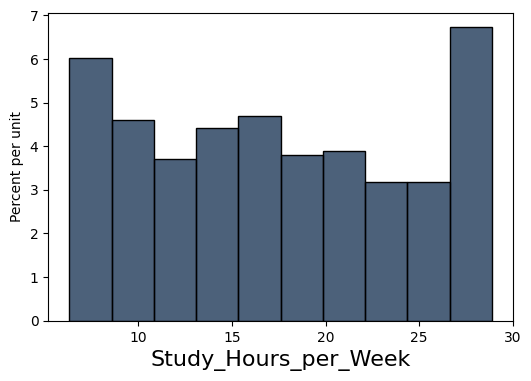

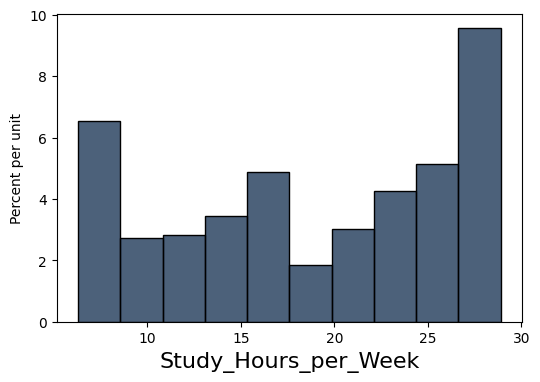

In [54]:
business_dp_total_score.where('Family_Income_Level', 0).select('Study_Hours_per_Week').sample(500, with_replacement=True).hist()
business_dp_total_score.where('Family_Income_Level', 1).select('Study_Hours_per_Week').sample(500, with_replacement=True).hist()
business_dp_total_score.where('Family_Income_Level', 2).select('Study_Hours_per_Week').sample(500, with_replacement=True).hist()

- Tương tự như stress level, thời gian học trong tuần của nhóm sinh viên có gia đình khá giả cũng phân hoá, hoặc là rất nhiều hoặc là rất ít
- Đối với nhóm gia đình thu nhập mức thấp đến trung bình, thời gian học của các sinh viên ít có phân hoá hơn khi vẫn có bộ phận lớn sinh viên học ở mức 12 - 22 tiếng 1 tuần

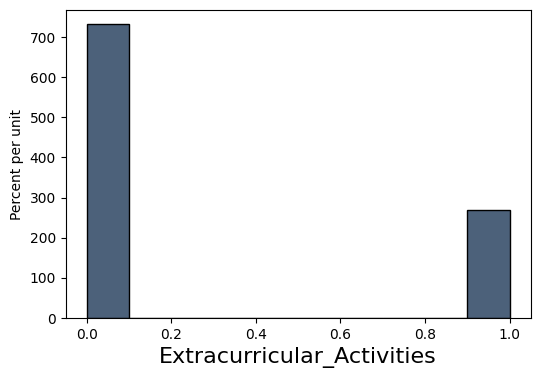

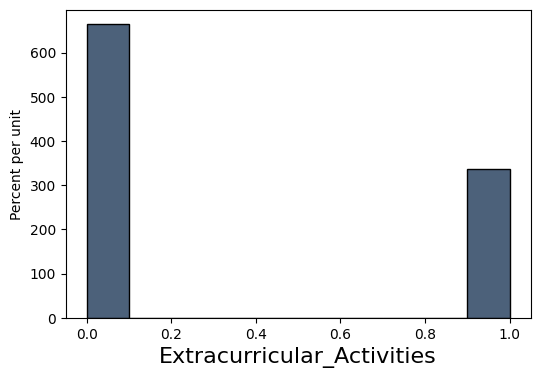

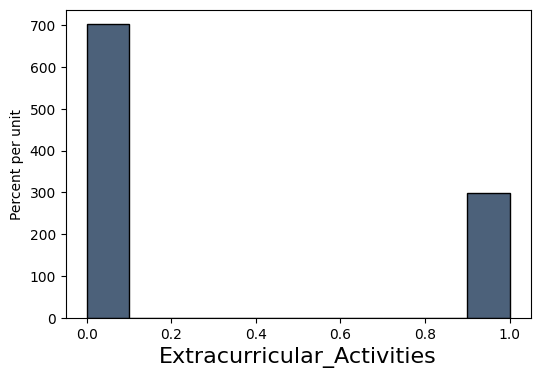

In [55]:
business_dp_total_score.where('Family_Income_Level', 0).select('Extracurricular_Activities').sample(500, with_replacement=True).hist()
business_dp_total_score.where('Family_Income_Level', 1).select('Extracurricular_Activities').sample(500, with_replacement=True).hist()
business_dp_total_score.where('Family_Income_Level', 2).select('Extracurricular_Activities').sample(500, with_replacement=True).hist()

- Nhóm sinh viên có gia đình khá giả cũng là nhóm tham gia nhiều nhất các hoạt động ngoại khóa.

- Tuy nhiên, nếu nhìn tổng thể, sinh viên ngành Business ít tham gia các hoạt động ngoại khóa, khi tỷ lệ sinh viên tham gia chỉ chiếm dưới 30% tổng số.

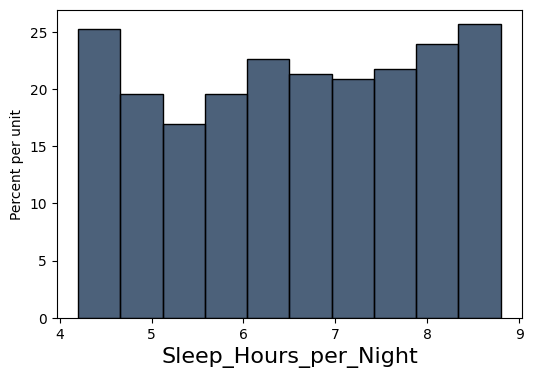

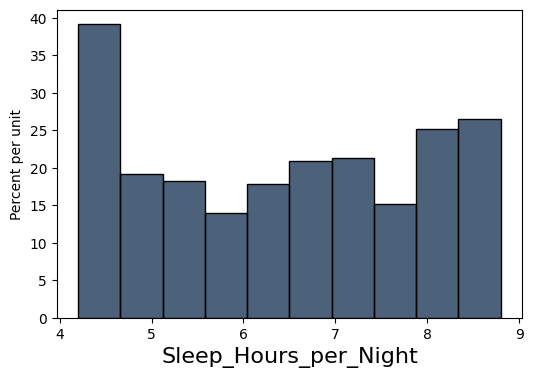

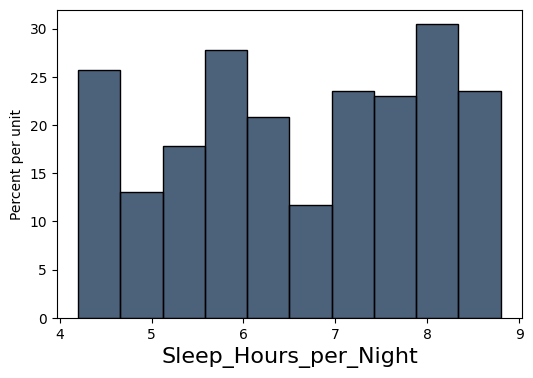

In [56]:
business_dp_total_score.where('Family_Income_Level', 0).select('Sleep_Hours_per_Night').sample(500, with_replacement=True).hist()
business_dp_total_score.where('Family_Income_Level', 1).select('Sleep_Hours_per_Night').sample(500, with_replacement=True).hist()
business_dp_total_score.where('Family_Income_Level', 2).select('Sleep_Hours_per_Night').sample(500, with_replacement=True).hist()

- Nhóm sinh viên khá giả tiếp tục dẫn đầu về tỉ lệ sinh viên ngủ hơn 7 tiếng buổi tối, nếu so sánh tỉ lệ sinh viên ngủ dưới 5 tiếng mỗi tối thì nhóm sinh viên khá giá cũng có số liệu thấp hơn 2 nhóm còn lại, cho thấy phần lớn nhóm sinh viên này khá quan tâm đến sức khoẻ giấc ngủ của mình
- Kết hợp với những dữ liệu trên cho thấy nhóm sinh viên khá giả dường như tận dụng tốt quỹ thời gian của mình hơn

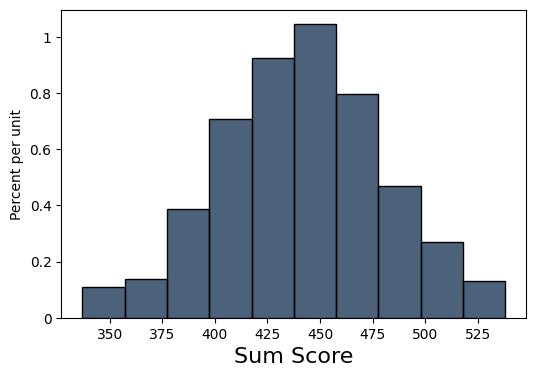

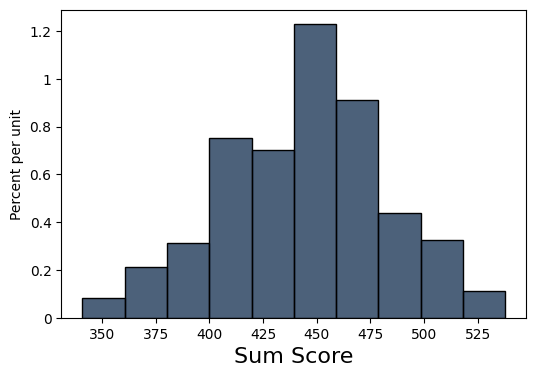

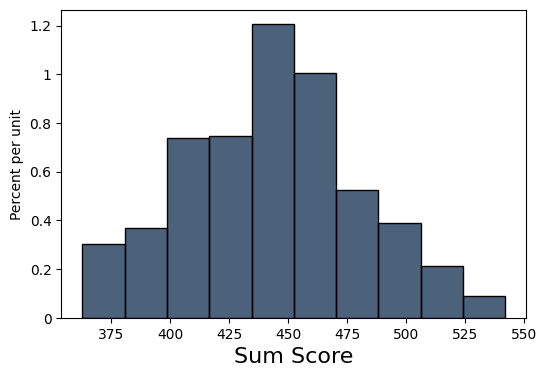

In [57]:
business_dp_total_score.where('Family_Income_Level', 0).select('Sum Score').sample(500, with_replacement=True).hist()
business_dp_total_score.where('Family_Income_Level', 1).select('Sum Score').sample(500, with_replacement=True).hist()
business_dp_total_score.where('Family_Income_Level', 2).select('Sum Score').sample(500, with_replacement=True).hist()

- Trong khi nhóm sinh viên có thu nhập gia đình từ thấp đến vừa có mức điểm tổng được phân phối theo phân phối chuẩn khá ổn định và tương đồng, phân phối điểm của nhóm sinh viên giàu có cho thấy một số điểm đặc biệt

- Đây là hệ quả của việc thiếu cân bằng giữa học tập và giải trí của nhóm sinh viên giàu có những sinh viên chăm chỉ học vẫn đạt điểm cao, trong khi những sinh viên không dành quá nhiều thời gian cho học tập và ngủ nghỉ thì kết quả học tập kém cỏi. Tuy nhiên, nếu sinh viên thực sự xuất sắc, họ sẽ thể hiện sự vượt trội rõ rệt, luôn dẫn đầu so với những sinh viên trong 2 nhóm còn lại

Bây giờ, chúng ta sẽ tìm kiếm một chế độ sinh hoạt tối ưu để đạt được điểm cao trong ngành Business, cụ thể là hướng tới việc lọt vào top 85% của lớp.

In [58]:
sum_score = business_dp_total_score.column("Sum Score")
score_85 = percentile(85, sum_score)
print("Mức điểm cần đạt để vào top 85% của ngành: " , score_85)
business_dp_lifestyle = business_dp_total_score.select('Family_Income_Level', 'Study_Hours_per_Week', 'Sleep_Hours_per_Night', 'Sum Score', 'Stress_Level (1-10)', 'Extracurricular_Activities')
excel_business_dp_total_score = business_dp_total_score.select('Family_Income_Level', 'Study_Hours_per_Week', 'Sleep_Hours_per_Night', 'Sum Score', 'Stress_Level (1-10)', 'Extracurricular_Activities').where("Sum Score", are.above_or_equal_to(score_85))



Mức điểm cần đạt để vào top 85% của ngành:  482.21


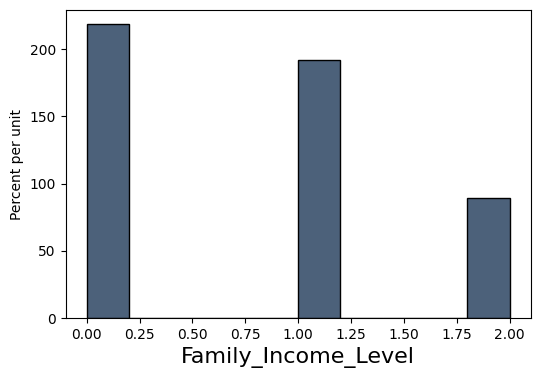

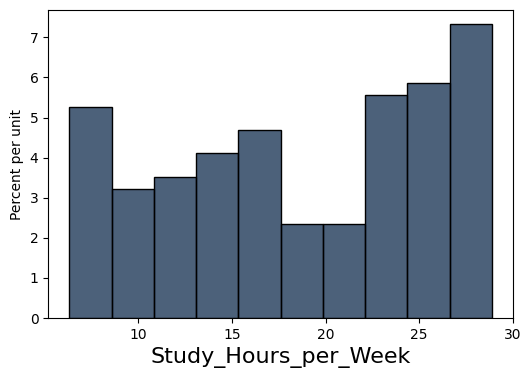

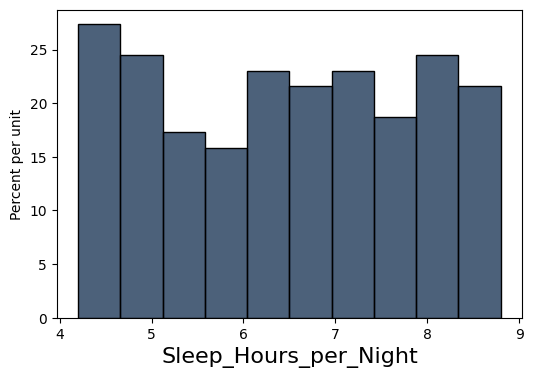

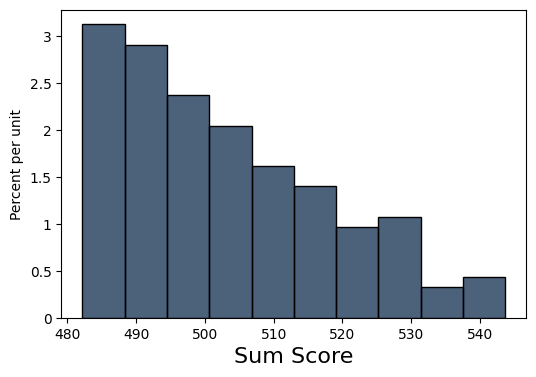

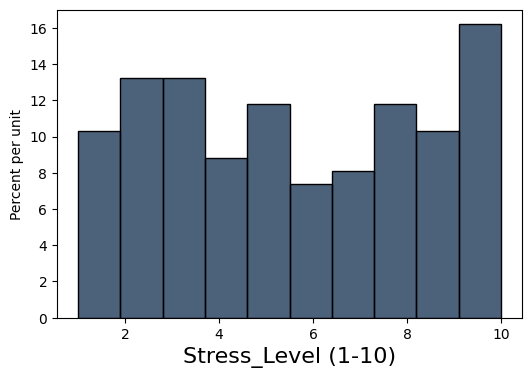

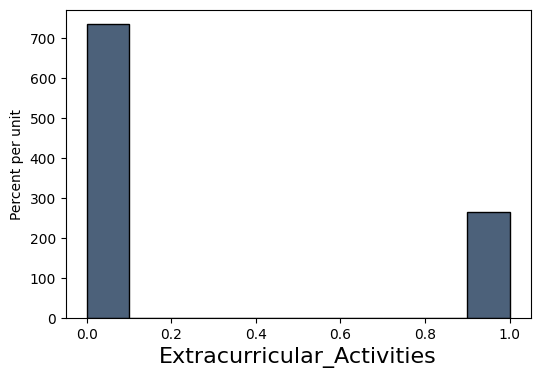

In [59]:
for label in excel_business_dp_total_score.labels:
    excel_business_dp_total_score.hist(label)

In [60]:
# Calculate average for numeric columns only
for label in excel_business_dp_total_score.labels:
    column = excel_business_dp_total_score.column(label)
    if np.issubdtype(np.array(column).dtype, np.number):
        avg = np.mean(column)
        print(f"Trung bình của {label}: {avg}")

Trung bình của Family_Income_Level: 0.7417218543046358
Trung bình của Study_Hours_per_Week: 18.681456953642385
Trung bình của Sleep_Hours_per_Night: 6.473509933774834
Trung bình của Sum Score: 502.9858013245033
Trung bình của Stress_Level (1-10): 5.582781456953643
Trung bình của Extracurricular_Activities: 0.26490066225165565


Bây giờ, chúng ta sẽ xây dựng một mô hình hồi quy tuyến tính để dự đoán điểm số dựa trên chế độ sinh hoạt. Mục tiêu là kiểm định xem các giá trị và mối quan hệ đã xác định trước đó có chính xác hay không.

In [61]:
from datascience import *
import numpy as np
from scipy.optimize import minimize

# Load the table
tbl = excel_business_dp_total_score

# Choose predictors and target
predictor_labels = [label for label in tbl.labels if label != "Sum Score"]
X_raw = np.array([tbl.column(label) for label in predictor_labels]).T

y = tbl.column("Sum Score")

# Standardize predictors and response
X_means = np.mean(X_raw, axis=0)
X_stds = np.std(X_raw, axis=0)
X_su = (X_raw - X_means) / X_stds

y_mean = np.mean(y)
y_std = np.std(y)
y_su = (y - y_mean) / y_std

# Add bias column to X_su for intercept calculation
X_su_with_bias = np.column_stack((np.ones(X_su.shape[0]), X_su))

# Compute optimal weights using minimize on RMSE
def su_rmse(params):
    predictions_su = X_su_with_bias @ params
    return np.sqrt(np.mean((y_su - predictions_su) ** 2))

initial = np.zeros(X_su_with_bias.shape[1])
result = minimize(su_rmse, initial)
params_su = result.x  # [intercept_su, slope1_su, slope2_su, ...]

# Convert SU params back to original units
intercept = y_std * params_su[0] + y_mean
slopes = y_std * params_su[1:] / X_stds

# Print final model
print(f"Intercept: {intercept:.3f}")
for i, label in enumerate(predictor_labels):
    print(f"Slope for {label}: {slopes[i]:.3f}")

# Compute final predictions and lw_rmse
y_pred = intercept + (X_raw @ slopes)
residuals = y - y_pred
lw_rmse = np.sqrt(np.mean(residuals ** 2))
print(f"Least-Works RMSE: {lw_rmse:.3f}")


Intercept: 502.986
Slope for Family_Income_Level: 0.021
Slope for Study_Hours_per_Week: -0.053
Slope for Sleep_Hours_per_Night: 1.473
Slope for Stress_Level (1-10): -0.056
Slope for Extracurricular_Activities: 2.709
Least-Works RMSE: 17.545


Giờ đây, chúng ta sẽ sử dụng mô hình Linear Regression để dự đoán Tổng điểm (Sum Score), dựa trên các giá trị trung bình của các yếu tố lối sống mà chúng ta đã xác định được trước đó. Phương pháp này sẽ giúp kiểm tra xem những yếu tố nào thực sự có ảnh hưởng tích cực đến kết quả học tập và mức độ đóng góp của từng yếu tố, đồng thời giúp kiểm nghiệm xem giả thuyết chúng ta đưa ra có phù hợp không

In [62]:
# #excel
intercept = 502.986
slope_family_income_level = 0.021
slope_study_hours_per_week = -0.053
slope_sleep_hours_per_night = 1.473
slope_stress_level = -0.056
slope_extracurricular_activities = 2.709

# # Assigning average values to variables
avg_family_income_level = 0.7417218543046358
avg_study_hours_per_week = 18.68145695364239
avg_sleep_hours_per_night = 6.473509933774834
avg_stress_level = 5.582781456953643
avg_extracurricular_activities = 0.26490066225165565



# Use the linear model to predict Sum Score with the average values
sum_score_predicted = intercept + (slope_family_income_level * avg_family_income_level) + \
                      (slope_study_hours_per_week * avg_study_hours_per_week) + \
                      (slope_sleep_hours_per_night * avg_sleep_hours_per_night) + \
                      (slope_stress_level * avg_stress_level) + \
                      (slope_extracurricular_activities * avg_extracurricular_activities)

# Print the predicted Sum Score
print(f"Predicted Sum Score based on average values: {sum_score_predicted:.3f}")



Predicted Sum Score based on average values: 511.952


In [63]:
filtered = business_dp_lifestyle.where(
    (business_dp_lifestyle.column("Study_Hours_per_Week") >= 16.5) & 
    (business_dp_lifestyle.column("Study_Hours_per_Week") <= 20) &
    (business_dp_lifestyle.column("Sleep_Hours_per_Night") >= 6) &
    (business_dp_lifestyle.column("Sleep_Hours_per_Night") <= 7) &
    (business_dp_lifestyle.column("Stress_Level (1-10)") >= 4) &
    (business_dp_lifestyle.column("Stress_Level (1-10)") <= 7) &
    (
        (business_dp_lifestyle.column("Extracurricular_Activities") == 1) |
        (business_dp_lifestyle.column("Extracurricular_Activities") == 0)
    ) &
    (
        (business_dp_lifestyle.column("Family_Income_Level") == 1) |
        (business_dp_lifestyle.column("Family_Income_Level") == 0)
    )
)
filtered

Family_Income_Level | Study_Hours_per_Week | Sleep_Hours_per_Night | Sum Score | Stress_Level (1-10) | Extracurricular_Activities
0                   | 19.6                 | 6.3                   | 417.2     | 4                   | 1
1                   | 19.1                 | 6.1                   | 387.05    | 7                   | 1
0                   | 19.9                 | 6.2                   | 430.4     | 7                   | 1
0                   | 18.6                 | 6.2                   | 472.57    | 4                   | 1
1                   | 17.2                 | 6.2                   | 457.48    | 5                   | 1

- Using excel table: Predicted Sum Score based on average values: 511.952

Kết quả cho thấy: Tổng điểm dự đoán 511.9 > score_85, điều này chứng tỏ chiến lược hiện tại đang áp dụng là khá hiệu quả. Do đó, sinh viên ngành Business nên cân nhắc xây dựng chế độ sinh hoạt theo các mức trung bình sau:

Thu nhập gia đình trung bình: 0.75

Số giờ học mỗi tuần trung bình: 18.7 giờ

Số giờ ngủ mỗi đêm trung bình: 6.5 giờ

Mức độ căng thẳng trung bình (1–10): 5.6

Tần suất tham gia hoạt động ngoại khóa trung bình: 0.26

Việc duy trì những thói quen này có thể giúp sinh viên đạt được điểm tổng kết thuộc nhóm top 15% của lớp.

---

### Dự đoán bằng mô hình Linear Regression

- Mô hình hồi quy tuyến tính được áp dụng để dự đoán **Tổng điểm (Sum Score)** dựa trên các giá trị trung bình của lối sống.  
- Kết quả dự đoán: **511.9**, cao hơn ngưỡng **score_85**, cho thấy chiến lược hiện tại là **hiệu quả**.

---

### Chiến lược lối sống tối ưu (gợi ý cho sinh viên Business)

| Yếu tố                       | Giá trị trung bình nên hướng tới |
|-----------------------------|----------------------------------|
| Thu nhập gia đình           | 0.75                             |
| Giờ học mỗi tuần            | 18.7 giờ                         |
| Giờ ngủ mỗi đêm             | 6.5 giờ                          |
| Mức độ stress (thang 1–10)  | 5.6                              |
| Tần suất tham gia ngoại khóa| 0.26                             |

---

# Tổng kết
## Kết Luận I
✅ 1. Tương quan rất yếu gần như không tồn tại
Biến so sánh	Hệ số tương quan (r)	Giải thích
Stress vs. Sleep Hours	0.016	Gần như không tương quan
Stress vs. Study Hours/Week	0.012	Cực kỳ yếu, gần bằng 0

👉 Điều này cho thấy: càng ngủ nhiều hoặc học nhiều không đồng nghĩa với mức độ căng thẳng thay đổi rõ rệt.

📊 2. Biểu đồ scatter + đường hồi quy
Cả hai biểu đồ (Sleep ↔ Stress, Study ↔ Stress) đều cho thấy đường hồi quy gần như phẳng.

Các điểm dữ liệu phân bố đều theo chiều ngang → không có xu hướng rõ ràng.

📦 3. Biểu đồ boxplot theo nhóm
a. Theo nhóm giờ ngủ
Các nhóm ngủ <5h, 5–6.5h, 6.5–8h, >8h đều có:

Median mức stress gần giống nhau (~5)

Phân bố tương đối đều từ 1 → 10

b. Theo nhóm giờ học
Tương tự: các nhóm <10h, 10–20h, 20–30h, >30h không có sự khác biệt rõ ràng về median hoặc IQR stress.

📌 Không nhóm nào có mức độ căng thẳng vượt trội hoặc thấp nổi bật.

📌 Tóm lại: Kết luận trả lời cho câu hỏi
“Mức độ căng thẳng (Stress_Level) có liên quan gì đến giấc ngủ hoặc giờ học?”

❌ Không có mối liên hệ rõ rệt.
Cả về mặt thống kê (hệ số tương quan gần 0)

Lẫn trực quan (biểu đồ cho thấy phân bố tương tự nhau)

👉 Giải thích khả dĩ:
Mức độ căng thẳng có thể bị ảnh hưởng bởi các yếu tố khác như:

Áp lực gia đình

Lo âu cá nhân

Mối quan hệ xã hội

## Kết luận II
Sau khi phân tích kỹ hơn về phân phối của từng nhóm Study_Hours_per_week, có **kết luận** sau:
- Nhóm học từ **16 - 21 giờ / tuần** có kết quả tốt hơn chút so với các nhóm còn lại, bởi giá trị **max** cao hơn chút mà vẫn giữ được giá trị **mean** tương đối giống với các nhóm khác.
- Sự phân phối của **Total_Score** theo từng nhóm **Study_Hours_per_Week** là không có sự khác biệt quá nhiều cả về **Min, Max, Mean, IQR**.
- **Số giờ học không phải là yếu tố quyết định chính đến tổng điểm**: Có thể các yếu tố khác như chất lượng giờ học, phương pháp học tập, mức độ tập trung, kiến thức nền tảng có ảnh hưởng lớn hơn đến điểm số.

✅ Như vậy đã trả lời cho câu hỏi **"Sinh viên nên học trong khoảng bao nhiêu giờ / tuần để đạt được kết quả cao ?**. Đó là **Số giờ học không quyết định đến tổng điểm**, có sinh viên học ít (6 - 11 tiếng / tuần) đạt được kết quả cao, tuy nhiên nên học trong **16 - 21 giờ / tuần** để đạt được kết quả cao nhất.

## Kết luận III
🔹 Trình độ học vấn của cha mẹ có **mối tương quan hạn chế** với thành tích học tập và chỉ số hạnh phúc của học sinh.  
🔹 Cha mẹ có bằng **Tiến sĩ (PhD)** thể hiện **một số lợi thế vừa phải** về điểm số và tỷ lệ chuyên cần, nhưng **không có ý nghĩa thống kê**.  
🔹 Cha mẹ có bằng **Thạc sĩ (Master)** liên quan đến **mức độ căng thẳng cao hơn** ở học sinh; trong khi nhóm có cha mẹ có bằng **Cử nhân (Bachelor)** lại học tập **chăm chỉ nhất**.  
🔹 **35,6% dữ liệu "Không báo cáo"** cho thấy **sự cần thiết phải cải thiện phương pháp thu thập dữ liệu**.  

🔹 Các hoạt động ngoại khóa **không cho thấy tác động đáng kể** đến thành tích học tập qua các chỉ số.  
🔹 Phân bố điểm số giữa các nhóm **gần như giống hệt nhau**.  
🔹 Tỷ lệ tham gia **ổn định giữa các khoa và các nhóm thu nhập**.  
🔹 Sự đánh đổi về sức khỏe tinh thần: **Giảm nhẹ mức độ căng thẳng** (-0.07) nhưng **giảm nhẹ thời gian ngủ** (-0.04 giờ).

## Kết luận IV
Báo cáo này tập trung vào phân tích nhóm sinh viên ngành **Business** nhằm tìm ra các yếu tố **lối sống tối ưu** giúp cải thiện **hiệu suất học tập**, cụ thể là đạt điểm số trong **top 15%** của toàn ngành.


### Các phát hiện chính

- **Midterm và Final Score** có phân phối tương tự nhau, nhưng hơn **50% sinh viên có điểm Final cao hơn Midterm**, cho thấy xu hướng cải thiện vào cuối kỳ.

- **Gia đình có thu nhập khá giả chỉ chiếm 17.89%**, phần lớn sinh viên thuộc tầng lớp thu nhập thấp - trung bình.

- **Sinh viên giàu chia thành 2 nhóm rõ rệt**:  
  - Một nhóm cực kỳ thư giãn với mức stress thấp  
  - Nhóm còn lại lại có mức stress rất cao  
  - Mức độ stress trung bình lại hiếm gặp

- **Hoạt động ngoại khóa**:  
  - Sinh viên giàu tham gia nhiều nhất  
  - Tuy nhiên, toàn ngành Business có tỷ lệ tham gia dưới **30%**

- **Chênh lệch học tập** rõ rệt:  
  - Sinh viên học hành nghiêm túc có điểm cao  
  - Nhóm quá sa đà vào vui chơi thường có điểm rất thấp  
  - Những sinh viên thực sự giỏi có thể vượt trội hơn cả nhóm có stress thấp

Việc **cá nhân hóa cách tính điểm theo từng khoa** giúp đơn giản hóa quy trình đánh giá và xây dựng nền tảng cho việc phát triển các **mô hình sống tối ưu** cho sinh viên. Cách tiếp cận này không chỉ mang tính học thuật mà còn có giá trị thực tiễn, mở ra hướng đi mới trong việc hỗ trợ sinh viên nâng cao kết quả học tập một cách khoa học và bền vững.
